In [1]:
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

import fiona  # type: ignore
from fiona.crs import from_epsg # type: ignore
import geopandas as gpd  # type: ignore
import shapely # type: ignore
from shapely.geometry import Point

import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore


%matplotlib inline

In [2]:
#Read EstSoil-EH

estsoil_12c = "Data\EstSoil-EH_v1.2c.shp\EstSoil-EH_v1.2c.shp"
data = gpd.read_file(estsoil_12c,encoding='utf-8')
display(data.head())

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,...,grassland_,area_wetla,wetland_pc,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry
0,0,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,0.000000,0.0,0.0,0.000000,0.000000,0.066504,0.003678,1808.194742,99.996322,"POLYGON ((698614.390 6447795.940, 698612.523 6..."
1,1,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((668432.067 6543565.911, 668425.630 6..."
2,2,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,71.058156,0.0,0.0,386.624055,14.876251,359.077009,13.816315,0.000000,0.000000,"POLYGON ((668550.130 6543573.200, 668543.495 6..."
3,3,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,66.551261,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((679817.320 6545854.050, 679829.522 6..."
4,4,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,98.280958,0.0,0.0,0.000000,0.000000,28.399424,1.719042,0.000000,0.000000,"POLYGON ((677362.640 6546501.230, 677345.370 6..."


In [3]:
#Drop soc1 soc2 soc3 soc4 values
no_soc_data = data.drop(["soc1","soc2","soc3","soc4"],axis=1)
no_soc_data.columns

Index(['orig_fid', 'est_soilty', 'wrb_code', 'wrb_main', 'est_txcode',
       'nlayers', 'zmx', 'z1', 'est_txt1', 'lxtype1', 'est_crs1', 'sand1',
       'silt1', 'clay1', 'rock1', 'bd1', 'k1', 'awc1', 'z2', 'est_txt2',
       'lxtype2', 'est_crs2', 'sand2', 'silt2', 'clay2', 'rock2', 'bd2', 'k2',
       'awc2', 'z3', 'est_txt3', 'lxtype3', 'est_crs3', 'sand3', 'silt3',
       'clay3', 'rock3', 'bd3', 'k3', 'awc3', 'z4', 'est_txt4', 'lxtype4',
       'est_crs4', 'sand4', 'silt4', 'clay4', 'rock4', 'bd4', 'k4', 'awc4',
       'unit_area', 'tri_mean', 'tri_stdev', 'tri_median', 'twi_mean',
       'twi_stdev', 'twi_median', 'slp_mean', 'slp_stdev', 'slp_median',
       'ls_mean', 'ls_stdev', 'ls_median', 'area_drain', 'drain_pct',
       'area_arabl', 'arable_pct', 'area_fores', 'forest_pct', 'area_grass',
       'grassland_', 'area_wetla', 'wetland_pc', 'area_urban', 'urban_pct',
       'area_water', 'water_pct', 'area_other', 'other_pct', 'geometry'],
      dtype='object')

In [4]:
#Drop all unnecessary columns(ones which are calculated based on previous SOC data and the ones which are already exist in soc_samples data)
#before joining to soc_samples data


sorted_data = no_soc_data.drop(['wrb_code','wrb_main', 'nlayers', 'est_txt1', 'lxtype1', 'est_crs1', 'bd1', 'est_txt2', 'lxtype2', 
                    'est_crs2','bd2','k2','est_txt3', 'lxtype3', 'est_crs3', 'bd3', 'k3', 'est_txt4','lxtype4','est_crs4',
                       'bd4', 'k4','unit_area', 'tri_mean', 'tri_stdev', 'tri_median', 'twi_mean','twi_stdev', 'twi_median', 
                       'slp_mean', 'slp_stdev', 'slp_median',  'ls_mean', 'ls_stdev', 'ls_median', 'area_drain', 'drain_pct',
                       'area_arabl', 'arable_pct', 'area_fores', 'forest_pct', 'area_grass','grassland_', 'area_wetla', 
                       'wetland_pc', 'area_urban', 'urban_pct','area_water', 'water_pct', 'area_other', 'other_pct', 'geometry',
                        'awc2', 'awc3', 'awc4' ],axis=1)

sorted_data.head()



,orig_fid,est_soilty,est_txcode,zmx,z1,sand1,silt1,clay1,rock1,k1,...,z3,sand3,silt3,clay3,rock3,z4,sand4,silt4,clay4,rock4
0,0,Ag,l,1000.0,1000.0,90,5,5,0,133.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ag,l,1000.0,1000.0,90,5,5,0,133.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Ag,l,1000.0,1000.0,90,5,5,0,133.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Ag,l,1000.0,1000.0,90,5,5,0,133.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Ag,l,1000.0,1000.0,90,5,5,0,133.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# read soc data
soc_samples = gpd.read_file('Data\data_deposit_supplements_1.2c\data_deposit_supplements_1.2c\soc_rf_model\soc_rf_redone_3301.gpkg', layer = "soc_train_samples_outrem_origfid_avg")
soc_samples.head()


,orig_fid,SOC_mean,SOC_std,SOC_med,SOC_min,SOC_max,origin,origin_p,s_count,upd_siffer,...,area_other,unit_area,arable_pct,forest_pct,grassland_pct,wetland_pct,urban_pct,water_pct,other_pct,geometry
0,15159,11.078491,0.000559,11.078491,11.078095,11.078886,estonian_alvars_soil_sample_single_dataset.shp,0.500000,2,ArG,...,20363.430457,89012.199332,0.209052,30.211757,45.509613,16.460368,0.000000,1.192456,22.877123,POINT (443390.670 6494246.123)
1,22283,1.056000,0.669724,0.840000,0.440000,2.190000,envir_biosoils_survey.shp,1.000000,5,D,...,0.000000,25583.014316,44.760985,55.239015,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (661204.025 6433312.518)
2,45116,5.339205,NaN,5.339205,5.339205,5.339205,rmk_soil_data.shp,1.000000,1,Dg,...,0.000000,1948.785206,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (593729.152 6457480.739)
3,86756,1.000000,0.000000,1.000000,1.000000,1.000000,envir_kese_muld_export.shp,1.000000,2,E2o,...,526.615939,62036.861342,82.160218,12.099221,0.000000,0.000000,4.891685,0.000000,0.848876,POINT (644275.296 6425833.836)
4,94817,4.029763,0.851630,3.514495,3.446287,5.128507,estonian_alvars_open_areas.shp,0.166667,6,Gh',...,149612.185454,354413.777500,0.515653,56.275738,0.693469,0.000000,0.035944,0.265209,42.213987,POINT (376404.901 6468198.723)


In [6]:
soc_samples.dtypes

orig_fid          int64
SOC_mean        float64
SOC_std         float64
SOC_med         float64
SOC_min         float64
                 ...   
wetland_pct     float64
urban_pct       float64
water_pct       float64
other_pct       float64
geometry       geometry
Length: 102, dtype: object

In [7]:
#merge dataframes of Soc_samples file and Estsoil-EH
merged_data = pd.merge(sorted_data, soc_samples, on= "orig_fid")
display(merged_data.sample(50))


,orig_fid,est_soilty,est_txcode,zmx,z1,sand1,silt1,clay1,rock1,k1,...,area_other,unit_area,arable_pct,forest_pct,grassland_pct,wetland_pct,urban_pct,water_pct,other_pct,geometry
354,458160,LkG,pl20-50/tsl,1000.0,350.0,90,3,7,0,113.71,...,5159.386484,1.433252e+05,0.000000,91.433631,0.000000,0.000000,4.966593,0.000000,3.599776,POINT (544986.815 6556747.659)
78,215185,K,ls₁20-30/r₂ls₁,1000.0,250.0,65,20,15,0,11.02,...,4068.809133,7.911529e+05,1.366400,91.777530,5.439649,0.734124,0.000000,0.168009,0.514289,POINT (446821.745 6497456.031)
7,95094,Gh'',r₁l30/p,1000.0,300.0,90,5,5,6,133.21,...,0.000000,4.690979e+04,0.000000,96.955069,0.000000,0.000000,3.044931,0.000000,0.000000,POINT (422147.974 6456591.214)
74,213407,Gr,ls₂15-20/+ls₂55/p,1000.0,175.0,55,30,15,0,9.04,...,34900.896381,4.869152e+04,0.000000,0.939170,25.135605,0.118164,0.000000,2.129502,71.677559,POINT (473484.823 6511036.029)
380,564426,LP,k⁰₁sl50/k⁰₁ls₂,1000.0,500.0,82,9,9,6,37.54,...,1404.585425,6.171433e+04,74.698611,16.824351,0.000000,0.000000,6.201092,0.000000,2.275947,POINT (663245.500 6457813.100)
200,298210,KIg,v⁰₁sl35/v⁰₁ls₁30-40/v₁ls₁,1000.0,350.0,82,9,9,6,37.54,...,8431.585060,5.376973e+05,86.385576,7.512886,1.877389,0.000000,1.469435,1.186624,1.568091,POINT (654570.272 6479316.878)
36,135076,GI1,pl50-80/tls,1000.0,650.0,90,3,7,0,113.71,...,0.000000,1.359409e+06,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (687028.719 6562065.250)
374,545669,LP,v⁰₂sl80-100/v⁰₂ls₁,1000.0,900.0,82,9,9,15,37.54,...,907.456240,5.126143e+05,95.273387,2.321735,0.921886,0.000000,1.305966,0.000000,0.177025,POINT (652698.216 6511947.221)
468,745489,TxR,t₁150,1500.0,1500.0,25,25,50,0,5.09,...,972.616247,5.634159e+05,0.000000,0.488021,0.000000,97.781608,0.000000,1.557742,0.172628,POINT (659337.913 6422417.387)
118,246815,Kg,r₂sl30/r₄sl,1000.0,300.0,82,9,9,15,37.54,...,2668.642048,3.406736e+05,1.828750,95.641061,1.103003,0.643843,0.000000,0.000000,0.783343,POINT (377199.969 6465730.631)


In [8]:
#columns and their types
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
merged_data.dtypes




orig_fid             int64
est_soilty          object
est_txcode          object
zmx                float64
z1                 float64
sand1                int64
silt1                int64
clay1                int64
rock1                int64
k1                 float64
awc1               float64
z2                 float64
sand2              float64
silt2              float64
clay2              float64
rock2              float64
z3                 float64
sand3              float64
silt3              float64
clay3              float64
rock3              float64
z4                 float64
sand4              float64
silt4              float64
clay4              float64
rock4              float64
SOC_mean           float64
SOC_std            float64
SOC_med            float64
SOC_min            float64
SOC_max            float64
origin              object
origin_p           float64
s_count              int64
upd_siffer          object
WRB_code            object
wrb_main            object
B

In [9]:
#unnecessary columns for the RF model are being dropped
processed_data = merged_data.drop(['est_txcode','zmx', 'z2','sand2','silt2',
               'clay2', 'rock2', 'z3', 'sand3', 'silt3','clay3','rock3', 'z4', 'sand4', 'silt4', 'clay4', 'rock4',
               'SOC_std', 'SOC_med','SOC_min','SOC_max','origin','origin_p','s_count', 'WRB_code', 'Boniteet',
              'Loimis1','loimis_rec','SOL_Z2','SOL_Z3','SOL_Z4','ao_hor_thick','EST_TXT2','LXTYPE2','EST_CRS2','SOL_SAND2','SOL_SILT2',
              'SOL_CLAY2', 'SOL_ROCK2','Varv','EST_TXT3','LXTYPE3','EST_CRS3','SOL_SAND3','SOL_SILT3','SOL_CLAY3','SOL_ROCK3',
              'EST_TXT4','LXTYPE4','EST_CRS4','SOL_SAND4','SOL_SILT4','SOL_CLAY4','SOL_ROCK4','SOL_SOC1','SOL_BD1',
              'SOL_BD2','SOL_SOC2','SOL_K2','SOL_AWC2','SOL_SOC3','SOL_BD3','SOL_K3','SOL_AWC3','SOL_SOC4','SOL_BD4',
              'SOL_K4','SOL_AWC4', 'USLE_K','HYDGRP','Huumus','unit_area',
              'geometry'], axis=1)


processed_data.columns

Index(['orig_fid', 'est_soilty', 'z1', 'sand1', 'silt1', 'clay1', 'rock1',
       'k1', 'awc1', 'SOC_mean', 'upd_siffer', 'wrb_main', 'nlayers',
       'SOL_ZMX', 'SOL_Z1', 'EST_TXT1', 'LXTYPE1', 'EST_CRS1', 'SOL_SAND1',
       'SOL_SILT1', 'SOL_CLAY1', 'SOL_ROCK1', 'SOL_K1', 'SOL_AWC1', 'slp_mean',
       'slp_median', 'slp_stdev', 'twi_mean', 'twi_median', 'twi_stdev',
       'ls_mean', 'ls_median', 'ls_stdev', 'tri_mean', 'tri_median',
       'tri_stdev', 'area_drain', 'drain_pct', 'ao_hor_type', 'ao_hor_sel',
       'area_arable', 'area_forest', 'area_grassland', 'area_wetland',
       'area_urban', 'area_water', 'area_other', 'arable_pct', 'forest_pct',
       'grassland_pct', 'wetland_pct', 'urban_pct', 'water_pct', 'other_pct'],
      dtype='object')

In [10]:
#cheking the null values
processed_data.isnull().sum()

orig_fid            0
est_soilty          0
z1                  0
sand1               0
silt1               0
clay1               0
rock1               0
k1                  0
awc1                0
SOC_mean            0
upd_siffer          0
wrb_main            0
nlayers             0
SOL_ZMX             0
SOL_Z1              0
EST_TXT1            0
LXTYPE1             0
EST_CRS1            0
SOL_SAND1           0
SOL_SILT1           0
SOL_CLAY1           0
SOL_ROCK1           0
SOL_K1              0
SOL_AWC1            0
slp_mean            0
slp_median          0
slp_stdev           0
twi_mean            0
twi_median          0
twi_stdev           0
ls_mean             0
ls_median           0
ls_stdev            0
tri_mean            0
tri_median          0
tri_stdev           0
area_drain        297
drain_pct         297
ao_hor_type         0
ao_hor_sel          0
area_arable         0
area_forest         0
area_grassland      0
area_wetland        0
area_urban          0
area_water

In [11]:
#Filling missing values with the 0 of the respective columns

processed_data["area_drain"] = processed_data["area_drain"].fillna(0)  #fill with zero

processed_data["drain_pct"] = processed_data["drain_pct"].fillna(0) #fill with zero

processed_data.isnull().sum()

orig_fid          0
est_soilty        0
z1                0
sand1             0
silt1             0
clay1             0
rock1             0
k1                0
awc1              0
SOC_mean          0
upd_siffer        0
wrb_main          0
nlayers           0
SOL_ZMX           0
SOL_Z1            0
EST_TXT1          0
LXTYPE1           0
EST_CRS1          0
SOL_SAND1         0
SOL_SILT1         0
SOL_CLAY1         0
SOL_ROCK1         0
SOL_K1            0
SOL_AWC1          0
slp_mean          0
slp_median        0
slp_stdev         0
twi_mean          0
twi_median        0
twi_stdev         0
ls_mean           0
ls_median         0
ls_stdev          0
tri_mean          0
tri_median        0
tri_stdev         0
area_drain        0
drain_pct         0
ao_hor_type       0
ao_hor_sel        0
area_arable       0
area_forest       0
area_grassland    0
area_wetland      0
area_urban        0
area_water        0
area_other        0
arable_pct        0
forest_pct        0
grassland_pct     0


In [12]:
#analyzing the "object" type columns
processed_data.select_dtypes(include=["object"])

,est_soilty,upd_siffer,wrb_main,EST_TXT1,LXTYPE1,EST_CRS1,ao_hor_type,ao_hor_sel
0,ArG,ArG,FL,ls1,SL,k⁰,no_info,single_h
1,D,D,UM,l,S,,no_info,single_h
2,Dg,Dg,UM,sl,LS,,no_info,single_h
3,E2o,E2o,RG,ls,L,v⁰,plain_huumus,single_h
4,Gh',Gh',LP,sl,LS,r,plain_huumus,single_h
...,...,...,...,...,...,...,...,...
467,S''',S''',HS,t3,PEAT,,no_info,single_h
468,TxR,TxR,HS,t1,PEAT,,no_info,single_h
469,TxR,TxR,HS,t1,PEAT,,no_info,single_h
470,TxR,TxR,HS,t1,PEAT,,no_info,single_h


In [13]:
no_cat_data =  processed_data.drop(['est_soilty','upd_siffer','wrb_main','EST_TXT1',
                               'LXTYPE1','EST_CRS1','ao_hor_type','ao_hor_sel','orig_fid','k1','awc1',
                                   'z1','nlayers'], axis =1)

In [14]:
#drop duplicate columns
no_cat_data = no_cat_data.drop(["SOL_CLAY1", "SOL_SAND1", "SOL_Z1","SOL_SILT1", "SOL_ZMX","SOL_ROCK1",
                               "SOL_K1",'SOL_AWC1'], axis =1)

In [15]:
#making sure that neither categorical column left 
no_cat_data.select_dtypes(include=["object"])

""
0
1
2
3
4
...
467
468
469
470


In [16]:
landuse = no_cat_data

def get_highest(row):
    
     highest_limit = 0
     highest_label = ""
    
     if row["arable_pct"] > highest_limit:
            highest_limit = row["arable_pct"]
            highest_label = "arable"
            
     if row["forest_pct"] > highest_limit:
            highest_limit = row["forest_pct"]
            highest_label = "forest"
        
     if row["wetland_pct"] > highest_limit:
            highest_limit = row["wetland_pct"]
            highest_label = "wetland"
        
     if row["urban_pct"] > highest_limit:
            highest_limit = row["urban_pct"]
            highest_label = "urban"
        
     if row["other_pct"] > highest_limit:
            highest_limit = row["other_pct"]
            highest_label = "other"
            
     if row["grassland_pct"] > highest_limit:
            highest_limit = row["grassland_pct"]
            highest_label = "grassland"
            
     if highest_limit == 0:
            highest_limit = row["other_pct"]
            highest_label = "other"

    
        

        
     return highest_label

        
    
    
landuse["landuse"] = landuse.apply(lambda row: get_highest(row), axis=1)

In [17]:
landuse

,sand1,silt1,clay1,rock1,SOC_mean,slp_mean,slp_median,slp_stdev,twi_mean,twi_median,twi_stdev,ls_mean,ls_median,ls_stdev,tri_mean,tri_median,tri_stdev,area_drain,drain_pct,area_arable,area_forest,area_grassland,area_wetland,area_urban,area_water,area_other,arable_pct,forest_pct,grassland_pct,wetland_pct,urban_pct,water_pct,other_pct,landuse
0,65,20,15,25,11.078491,1.169605,0.910082,0.901063,9.929913,9.657865,1.696798,5.253636,0.279295,10.367961,1.392533e+23,1.575201e+23,6.919626e+23,0.0,0.000,186.081469,26892.148947,40509.107083,14651.735166,0.000000,1061.431376,20363.430457,0.209052,30.211757,45.509613,16.460368,0.000000,1.192456,22.877123,grassland
1,90,5,5,0,1.056000,4.684322,4.218450,1.924464,7.979711,7.997821,1.189848,1.067075,0.863344,0.509742,3.796084e+00,3.947504e+00,1.222080e+00,0.0,0.000,11451.209081,14131.805235,0.000000,0.000000,0.000000,0.000000,0.000000,44.760985,55.239015,0.000000,0.000000,0.000000,0.000000,0.000000,forest
2,82,9,9,0,5.339205,2.132079,1.824831,1.155190,7.091621,6.264889,1.521681,0.455225,0.602095,0.229011,3.376664e+00,3.284537e+00,3.719893e-01,0.0,0.000,0.000000,1948.785206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,forest
3,55,30,15,6,1.000000,1.856459,1.629892,1.202796,6.851544,6.750208,0.904073,0.258317,0.177129,0.252912,1.921934e+00,1.777000e+00,7.756198e-01,13859.0,22.340,50969.620733,7505.976949,0.000000,0.000000,3034.647721,0.000000,526.615939,82.160218,12.099221,0.000000,0.000000,4.891685,0.000000,0.848876,arable
4,82,9,9,25,4.029763,0.563358,0.332539,0.544532,9.348648,9.025871,1.808803,0.069468,0.033145,0.095859,4.843221e-01,3.210009e-01,3.651608e-01,0.0,0.000,1827.544454,199448.969757,2457.748481,0.000000,127.390969,939.938384,149612.185454,0.515653,56.275738,0.693469,0.000000,0.035944,0.265209,42.213987,forest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,15,15,70,0,27.842227,0.425885,0.276521,0.376517,11.346289,11.247402,1.842612,0.064579,0.033135,0.084539,3.404102e-01,2.386114e-01,2.433990e-01,40814.0,3.583,0.000000,918850.772236,0.000000,220234.401899,0.000000,0.000000,0.000000,0.000000,80.665677,0.000000,19.334323,0.000000,0.000000,0.000000,forest
468,25,25,50,0,32.381090,0.772469,0.535976,0.650673,10.668461,10.061668,2.889351,0.069787,0.020563,0.106084,8.062253e-01,8.005230e-01,3.774825e-01,0.0,0.000,0.000000,2749.589735,0.000000,550917.153321,0.000000,8776.568721,972.616247,0.000000,0.488021,0.000000,97.781608,0.000000,1.557742,0.172628,wetland
469,25,25,50,0,30.951276,0.475692,0.283010,0.466070,10.696100,10.271890,2.775497,0.055243,0.004326,0.134774,5.571132e-01,5.039972e-01,3.298904e-01,0.0,0.000,0.000000,15893.860211,0.000000,602844.653179,0.000000,331.679532,6615.715479,0.000000,2.540230,0.000000,96.349406,0.000000,0.053011,1.057354,wetland
470,25,25,50,0,31.071152,0.274565,0.221193,0.220342,10.456750,10.271992,2.065842,0.035920,0.021481,0.046165,2.941446e-01,2.249178e-01,2.241282e-01,0.0,0.000,0.000000,3673.346712,0.000000,423777.045537,0.000000,0.000000,0.000000,0.000000,0.859362,0.000000,99.140638,0.000000,0.000000,0.000000,wetland


In [18]:
arable = landuse.loc[landuse['landuse'] == "arable"]

In [19]:
forest = landuse.loc[landuse['landuse'] == "forest"]

In [20]:
wetland = landuse.loc[landuse['landuse'] == "wetland"]

In [21]:
urban = landuse.loc[landuse['landuse'] == "urban"]

In [22]:
other = landuse.loc[landuse['landuse'] == "other"]

In [23]:
grassland = landuse.loc[landuse['landuse'] == "grassland"]

<h1>Arable <h1>

In [24]:
#Splitting data for machine learning

arable = arable.drop(["landuse","grassland_pct",
"forest_pct",
"arable_pct",
"area_grassland",
"area_forest",
"area_drain",
"other_pct",
"urban_pct",
"area_other",
"area_arable",
"area_wetland",
"wetland_pct",
"drain_pct",
"area_urban",
"water_pct",
"area_water"], axis =1)

y = np.array(arable['SOC_mean'])

x = arable.drop(['SOC_mean'], axis =1)


#Checking the shapes of data

print(f'x : {x.shape}')
print(f'y : {y.shape}')

x : (111, 16)
y : (111,)


In [25]:
arable.columns

Index(['sand1', 'silt1', 'clay1', 'rock1', 'SOC_mean', 'slp_mean',
       'slp_median', 'slp_stdev', 'twi_mean', 'twi_median', 'twi_stdev',
       'ls_mean', 'ls_median', 'ls_stdev', 'tri_mean', 'tri_median',
       'tri_stdev'],
      dtype='object')

In [26]:
#splitting data into test and train set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 101)

In [27]:
print(f'x_train : {x_train.shape}')
print(f'y_tain : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (88, 16)
y_tain : (88,)
x_test : (23, 16)
y_test : (23,)


In [28]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor 
randomforest = RandomForestRegressor()

<h1>Recursive feature elemination <h1>

In [29]:
rfe_arable = RFE(estimator=randomforest, step=1)
rfe_arable = rfe_arable.fit(x_train,y_train)

In [30]:
arable_rfe_features = pd.DataFrame({"Feature":list(x_train.columns),
                                     "Ranking": rfe_arable.ranking_})
arable_rfe_features.sort_values(by="Ranking")

,Feature,Ranking
3,rock1,1
5,slp_median,1
6,slp_stdev,1
10,ls_mean,1
11,ls_median,1
12,ls_stdev,1
14,tri_median,1
15,tri_stdev,1
7,twi_mean,2
8,twi_median,3


In [31]:
ar_x_train_rfe = rfe_arable.transform(x_train)
ar_x_test_rfe = rfe_arable.transform(x_test)

In [32]:
ar_fin_rfe_model =  randomforest.fit(ar_x_train_rfe,y_train)

In [33]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {randomforest.score(ar_x_train_rfe,y_train):.3f}')
print (f'Test Accuracy - : {randomforest.score(ar_x_test_rfe,y_test):.3f}')

Train Accuracy - : 0.878
Test Accuracy - : -0.038


Test accuracy and train accuracy are almost the same when feature elemination done by  RFE and Manually

RFE selected 66 out of 133 columns

 <h1>Training Model Evaluation<h1>

In [34]:
y_predict_train = ar_fin_rfe_model.predict((ar_x_train_rfe))

In [35]:
#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics

r_square_train = metrics.r2_score(y_train, y_predict_train)
print('R-Square Error associated with Random Forest Regression is: %.2f'%r_square_train)

R-Square Error associated with Random Forest Regression is: 0.88


In [36]:
#Mean absolute error evaluation
from sklearn.metrics import mean_absolute_error

print("The MAE is: %.2f" % mean_absolute_error(y_train, y_predict_train))    

The MAE is: 0.47


In [37]:
from sklearn.metrics import mean_squared_error
#Mean square error evaluation

print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_train, y_predict_train)))

rmsep = np.sqrt(np.mean(np.square(((y_train - y_predict_train) / y_train)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep)

Root Mean Squared Error associated with Random Forest Regression is: 0.72
Root Mean Squared Error in percentage: 0.32


In [38]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_train, y_predict_train))  

The EVS is: 0.88


 <h1>Test Model Evaluation<h1>

In [39]:
y_predict_test = ar_fin_rfe_model.predict(ar_x_test_rfe)

In [40]:
#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics

r_square = metrics.r2_score(y_test, y_predict_test)
print('R-Square Error associated with Random Forest Regression is: %.2f'%r_square)

R-Square Error associated with Random Forest Regression is: -0.04


In [41]:
#Mean absolute error evaluation
from sklearn.metrics import mean_absolute_error

print("The MAE is: %.2f" % mean_absolute_error(y_test, y_predict_test))      

The MAE is: 2.44


In [42]:
from sklearn.metrics import mean_squared_error
#Mean square error evaluation

print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_test, y_predict_test)))

rmsep = np.sqrt(np.mean(np.square(((y_test - y_predict_test) / y_test)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep)

Root Mean Squared Error associated with Random Forest Regression is: 5.59
Root Mean Squared Error in percentage: 0.76


In [43]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_test, y_predict_test))    

The EVS is: 0.02


<h1> Arable on final <h1>

In [44]:
#preprocessing of the final data
display(data.head())

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,est_crs1,sand1,silt1,clay1,rock1,soc1,bd1,k1,awc1,z2,est_txt2,lxtype2,est_crs2,sand2,silt2,clay2,rock2,soc2,bd2,k2,awc2,z3,est_txt3,lxtype3,est_crs3,sand3,silt3,clay3,rock3,soc3,bd3,k3,awc3,z4,est_txt4,lxtype4,est_crs4,sand4,silt4,clay4,rock4,soc4,bd4,k4,awc4,unit_area,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arabl,arable_pct,area_fores,forest_pct,area_grass,grassland_,area_wetla,wetland_pc,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry
0,0,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,7.393735,0.949777,133.21,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1808.261246,0.031453,0.026489,0.016483,12.539993,12.507403,0.453449,0.226311,0.181002,0.187266,0.025721,0.000000,0.047722,NaN,NaN,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.066504,0.003678,1808.194742,99.996322,"POLYGON ((698614.390 6447795.940, 698612.523 6..."
1,1,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,4.609710,1.128614,133.21,0.190833,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1042.409646,0.168890,0.141488,0.106648,8.267109,8.226672,0.818133,1.802826,1.430442,1.305622,0.154712,0.000000,0.215726,NaN,NaN,0.0,0.0,1042.409646,100.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((668432.067 6543565.911, 668425.630 6..."
2,2,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,4.143324,1.165374,133.21,0.192500,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2598.934724,0.279586,0.243441,0.199833,7.830969,7.614108,1.063368,3.521166,3.206231,2.545546,0.439148,0.408638,0.362313,NaN,NaN,0.0,0.0,24.841451,0.955832,1846.755097,71.058156,0.0,0.0,386.624055,14.876251,359.077009,13.816315,0.000000,0.000000,"POLYGON ((668550.130 6543573.200, 668543.495 6..."
3,3,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,2.546418,1.311652,133.21,0.195000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4997.621962,0.531916,0.474287,0.328851,5.769673,5.732581,1.080556,7.297202,6.521130,4.471773,0.856971,0.253316,1.096561,NaN,NaN,0.0,0.0,1671.641546,33.448739,3325.980417,66.551261,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((679817.320 6545854.050, 679829.522 6..."
4,4,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,3.423959,1.227016,133.21,0.188333,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1652.049209,0.296661,0.275507,0.193926,8.204620,8.160692,0.961941,3.493085,2.991859,2.659980,0.519368,0.157721,0.978945,NaN,NaN,0.0,0.0,0.000000,0.000000,1623.649785,98.280958,0.0,0.0,0.000000,0.000000,28.399424,1.719042,0.000000,0.000000,"POLYGON ((677362.640 6546501.230, 677345.370 6..."


In [45]:
data.dtypes
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 745432 entries, 0 to 745431
Data columns (total 85 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   orig_fid    745432 non-null  int64   
 1   est_soilty  745432 non-null  object  
 2   wrb_code    745432 non-null  object  
 3   wrb_main    745432 non-null  object  
 4   est_txcode  745426 non-null  object  
 5   nlayers     745432 non-null  float64 
 6   zmx         745432 non-null  float64 
 7   z1          745432 non-null  float64 
 8   est_txt1    745426 non-null  object  
 9   lxtype1     745426 non-null  object  
 10  est_crs1    211045 non-null  object  
 11  sand1       745432 non-null  int64   
 12  silt1       745432 non-null  int64   
 13  clay1       745432 non-null  int64   
 14  rock1       745432 non-null  int64   
 15  soc1        745432 non-null  float64 
 16  bd1         745425 non-null  float64 
 17  k1          745432 non-null  float64 
 18  awc1        7449

In [46]:
#dropping unnecessary columns
estsoil = data.drop(["soc1","soc2","soc3","soc4","bd1","bd2","bd3","bd4"],axis=1)

estsoil["drain_pct"] = estsoil["drain_pct"].fillna(0)
estsoil["area_drain"] = estsoil["area_drain"].fillna(0)
estsoil  = estsoil.dropna(subset=["tri_median","ls_median","twi_median","twi_mean","slp_mean" ,"awc1"])



In [47]:


#editing typos in column names
estsoil.rename(columns={ 'area_wetla' : 'area_wetland', 'grassland_' : 'grassland_pct', 
                             'area_fores':'area_forest', 'wetland_pc': 'wetland_pct' }, inplace=True)
estsoil

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,est_crs1,sand1,silt1,clay1,rock1,k1,awc1,z2,est_txt2,lxtype2,est_crs2,sand2,silt2,clay2,rock2,k2,awc2,z3,est_txt3,lxtype3,est_crs3,sand3,silt3,clay3,rock3,k3,awc3,z4,est_txt4,lxtype4,est_crs4,sand4,silt4,clay4,rock4,k4,awc4,unit_area,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arabl,arable_pct,area_forest,forest_pct,area_grass,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry
1,1,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.190833,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1042.409646,0.168890,0.141488,0.106648,8.267109,8.226672,0.818133,1.802826,1.430442,1.305622,0.154712,0.000000,0.215726,0.0,0.000,0.000000,0.000000,1042.409646,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((668432.067 6543565.911, 668425.630 6..."
2,2,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.192500,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,2598.934724,0.279586,0.243441,0.199833,7.830969,7.614108,1.063368,3.521166,3.206231,2.545546,0.439148,0.408638,0.362313,0.0,0.000,0.000000,0.000000,24.841451,0.955832,1846.755097,71.058156,0.000000,0.000000,386.624055,14.876251,359.077009,13.816315,0.000000,0.000000,"POLYGON ((668550.130 6543573.200, 668543.495 6..."
3,3,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.195000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,4997.621962,0.531916,0.474287,0.328851,5.769673,5.732581,1.080556,7.297202,6.521130,4.471773,0.856971,0.253316,1.096561,0.0,0.000,0.000000,0.000000,1671.641546,33.448739,3325.980417,66.551261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((679817.320 6545854.050, 679829.522 6..."
4,4,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.188333,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1652.049209,0.296661,0.275507,0.193926,8.204620,8.160692,0.961941,3.493085,2.991859,2.659980,0.519368,0.157721,0.978945,0.0,0.000,0.000000,0.000000,0.000000,0.000000,1623.649785,98.280958,0.000000,0.000000,0.000000,0.000000,28.399424,1.719042,0.000000,0.000000,"POLYGON ((677362.640 6546501.230, 677345.370 6..."
5,5,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.188333,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,4649.640163,0.758535,0.660990,0.457811,6.269014,6.258756,1.306534,9.910546,8.545395,6.560650,2.028976,1.462374,2.308224,50.0,1.075,0.000000,0.000000,2451.064996,52.715155,2140.186683,46.029082,0.000000,0.000000,0.000000,0.000000,58.388484,1.255764,0.000000,0.000000,"POLYGON ((677015.810 6548550.780, 677015.910 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745427,745593,TyG,TC-rc-gl,TC,ls₁/sl/l,3.0,999.0,333.0,ls1,SL,None,65,20,15,0,11.02,0.185000,666.0,sl,LS,None,82.0,9.0,9.0,0.0,37.54,0.1660,999.0,l,S,None,90.0,5.0,5.0,0.0,133.21,0.160000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,24515.874901,0.211685,0.161656,0.180266,9.202388,9.198456,1.435720,2.849917,2.412656,2.262605,0.622811,0.520992,0.576101,24516.0,100.000,23968.723748,97.768176,187.522302,0.764902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,359.628850,1.466922,0.0

In [48]:


def get_highest(row):
    
     highest_limit = 0
     highest_label = ""
    
     if row["arable_pct"] > highest_limit:
            highest_limit = row["arable_pct"]
            highest_label = "arable"
            
     if row["forest_pct"] > highest_limit:
            highest_limit = row["forest_pct"]
            highest_label = "forest"
        
     if row["wetland_pct"] > highest_limit:
            highest_limit = row["wetland_pct"]
            highest_label = "wetland"
        
     if row["urban_pct"] > highest_limit:
            highest_limit = row["urban_pct"]
            highest_label = "urban"
        
     if row["other_pct"] > highest_limit:
            highest_limit = row["other_pct"]
            highest_label = "other"
            
     if row["grassland_pct"] > highest_limit:
            highest_limit = row["grassland_pct"]
            highest_label = "grassland"
            
     if highest_limit == 0:
            highest_limit = row["other_pct"]
            highest_label = "other"

    
        

        
     return highest_label

        
    
    
estsoil["landuse"] = estsoil.apply(lambda row: get_highest(row), axis=1)

In [49]:
estsoil

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,est_crs1,sand1,silt1,clay1,rock1,k1,awc1,z2,est_txt2,lxtype2,est_crs2,sand2,silt2,clay2,rock2,k2,awc2,z3,est_txt3,lxtype3,est_crs3,sand3,silt3,clay3,rock3,k3,awc3,z4,est_txt4,lxtype4,est_crs4,sand4,silt4,clay4,rock4,k4,awc4,unit_area,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arabl,arable_pct,area_forest,forest_pct,area_grass,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry,landuse
1,1,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.190833,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1042.409646,0.168890,0.141488,0.106648,8.267109,8.226672,0.818133,1.802826,1.430442,1.305622,0.154712,0.000000,0.215726,0.0,0.000,0.000000,0.000000,1042.409646,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((668432.067 6543565.911, 668425.630 6...",forest
2,2,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.192500,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,2598.934724,0.279586,0.243441,0.199833,7.830969,7.614108,1.063368,3.521166,3.206231,2.545546,0.439148,0.408638,0.362313,0.0,0.000,0.000000,0.000000,24.841451,0.955832,1846.755097,71.058156,0.000000,0.000000,386.624055,14.876251,359.077009,13.816315,0.000000,0.000000,"POLYGON ((668550.130 6543573.200, 668543.495 6...",grassland
3,3,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.195000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,4997.621962,0.531916,0.474287,0.328851,5.769673,5.732581,1.080556,7.297202,6.521130,4.471773,0.856971,0.253316,1.096561,0.0,0.000,0.000000,0.000000,1671.641546,33.448739,3325.980417,66.551261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((679817.320 6545854.050, 679829.522 6...",grassland
4,4,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.188333,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1652.049209,0.296661,0.275507,0.193926,8.204620,8.160692,0.961941,3.493085,2.991859,2.659980,0.519368,0.157721,0.978945,0.0,0.000,0.000000,0.000000,0.000000,0.000000,1623.649785,98.280958,0.000000,0.000000,0.000000,0.000000,28.399424,1.719042,0.000000,0.000000,"POLYGON ((677362.640 6546501.230, 677345.370 6...",grassland
5,5,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.188333,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,4649.640163,0.758535,0.660990,0.457811,6.269014,6.258756,1.306534,9.910546,8.545395,6.560650,2.028976,1.462374,2.308224,50.0,1.075,0.000000,0.000000,2451.064996,52.715155,2140.186683,46.029082,0.000000,0.000000,0.000000,0.000000,58.388484,1.255764,0.000000,0.000000,"POLYGON ((677015.810 6548550.780, 677015.910 6...",forest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745427,745593,TyG,TC-rc-gl,TC,ls₁/sl/l,3.0,999.0,333.0,ls1,SL,None,65,20,15,0,11.02,0.185000,666.0,sl,LS,None,82.0,9.0,9.0,0.0,37.54,0.1660,999.0,l,S,None,90.0,5.0,5.0,0.0,133.21,0.160000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,24515.874901,0.211685,0.161656,0.180266,9.202388,9.198456,1.435720,2.849917,2.412656,2.262605,0.622811,0.520992,0.576101,24516.0,100.000,23968.723748,97.768176,187.522302,0.764902,0.000000,0.000000,0.0

In [50]:
arable_estsoil = estsoil.loc[estsoil['landuse'] == "arable"]

In [51]:
arable_estsoil

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,est_crs1,sand1,silt1,clay1,rock1,k1,awc1,z2,est_txt2,lxtype2,est_crs2,sand2,silt2,clay2,rock2,k2,awc2,z3,est_txt3,lxtype3,est_crs3,sand3,silt3,clay3,rock3,k3,awc3,z4,est_txt4,lxtype4,est_crs4,sand4,silt4,clay4,rock4,k4,awc4,unit_area,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arabl,arable_pct,area_forest,forest_pct,area_grass,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry,landuse
34,34,Ag,FL-gln,FL,l/ls₁,2.0,1000.0,500.0,l,S,None,90,5,5,0,133.21,0.192083,1000.0,ls1,SL,None,65.0,20.0,15.0,0.0,11.02,0.179167,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,44993.052395,0.145153,0.084863,0.158573,8.807474,8.976397,1.195557,1.617483,0.973669,1.873993,0.069420,0.000000,0.130548,16331.0,36.297,30874.553222,68.620713,2165.287111,4.812492,10275.084089,22.837046,0.0,0.0,0.000000,0.000000,1144.166771,2.542985,533.961202,1.186764,"POLYGON ((638382.578 6420057.872, 638386.430 6...",arable
35,35,Ag,FL-gln,FL,l/ls₁,2.0,1000.0,500.0,l,S,None,90,5,5,0,133.21,0.193333,1000.0,ls1,SL,None,65.0,20.0,15.0,0.0,11.02,0.185000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,20654.341945,0.064151,0.058859,0.035046,9.297662,9.274544,0.625055,0.802687,0.730287,0.459233,0.063767,0.000000,0.084163,0.0,0.000,20618.420641,99.826084,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,35.921304,0.173916,"POLYGON ((681739.540 6544550.420, 681749.070 6...",arable
46,46,Ag,FL-gln,FL,l60/ls₁,2.0,1000.0,600.0,l,S,None,90,5,5,0,133.21,0.193600,1000.0,ls1,SL,None,65.0,20.0,15.0,0.0,11.02,0.184000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,41609.821776,0.164762,0.088733,0.158216,8.659997,9.059182,1.494954,1.845425,0.965526,1.915025,0.085121,0.000000,0.140095,6264.0,15.054,25066.820992,60.242558,11916.411631,28.638459,3281.793925,7.887066,0.0,0.0,0.000000,0.000000,1331.209628,3.199268,13.585600,0.032650,"POLYGON ((638033.790 6420816.530, 638036.660 6...",arable
50,50,Ag,FL-gln,FL,ls/l,2.0,1000.0,500.0,ls,L,None,55,30,15,0,9.04,0.189375,1000.0,l,S,None,90.0,5.0,5.0,0.0,133.21,0.180000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,20052.630650,0.155510,0.102434,0.143665,9.194246,9.220116,1.236165,1.973214,1.321501,1.827357,0.121616,0.000000,0.173731,0.0,0.000,11590.222485,57.799012,5942.438268,29.634208,2367.185963,11.804865,0.0,0.0,0.000000,0.000000,152.783934,0.761915,0.000000,0.000000,"POLYGON ((531845.250 6581287.410, 531835.860 6...",arable
61,61,Ag,FL-gln,FL,ls₁50/ls₂,2.0,1000.0,500.0,ls1,SL,None,65,20,15,0,11.02,0.195000,1000.0,ls2,L,None,55.0,30.0,15.0,0.0,9.04,0.186667,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,22831.102314,0.076529,0.063364,0.047424,9.379369,9.369836,0.695518,0.910702,0.707571,0.709065,0.076635,0.000000,0.101094,0.0,0.000,17253.517248,75.570233,743.806590,3.257865,4833.778477,21.171901,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((681778.550 6543634.830, 681779.150 6...",arable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745424,745590,TyG,TC-rc-gl,TC,k⁰₁sl40/thsl55/l,3.0,1000.0,400.0,sl,LS,k⁰,82,9,9,6,37.54,0.198750,700.0,th,HUMUS,None,25.0,25.0,50.0,0.0,5.09,0.195000,1000.0,l,S,None,90.0,5.0,5.0,0.0,133.21,0.185,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,7803.319210,0.224906,0.152656,0.204160,8.253915,8.380476,1.022108,2.258887,1.565480,2.029797,0.344207,0.158418,0.493318,1734.0,22.2

In [52]:
arable_estsoil = arable_estsoil[[
"rock1",
"slp_median",
"twi_mean",
"ls_mean",
"ls_median",
"ls_stdev",
"tri_median",
"tri_stdev"                           
            ]]

In [53]:
#analyzing "object" type columns
arable_estsoil.select_dtypes(include=["object"])

""
34
35
46
50
61
...
745424
745425
745427
745428


In [54]:
#checking null values
arable_estsoil.isnull().sum()

rock1         0
slp_median    0
twi_mean      0
ls_mean       0
ls_median     0
ls_stdev      0
tri_median    0
tri_stdev     0
dtype: int64

In [55]:
arable_estsoil.shape

(226715, 8)

In [56]:
# running model on final data
values = arable_estsoil.values

display(values.shape)
Prediction = ar_fin_rfe_model.predict(values)

arable_estsoil['SOC_pred'] = Prediction

display(arable_estsoil.sample(10))

(226715, 8)

C:\Users\y.Israfilbayov\AppData\Local\Temp\ipykernel_18876\3477870344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arable_estsoil['SOC_pred'] = Prediction


,rock1,slp_median,twi_mean,ls_mean,ls_median,ls_stdev,tri_median,tri_stdev,SOC_pred
218008,0,1.191260,8.107973,0.199787,0.225874,0.000000,0.072754,0.159895,3.637728
320615,85,0.963437,9.383653,0.118627,0.150409,0.080026,0.071632,0.083086,5.706650
382776,25,0.499041,9.789729,0.080976,0.092541,0.055295,0.037989,0.064378,5.779206
484805,0,0.748056,9.219627,0.246139,0.245829,0.199145,0.050756,0.111295,3.957569
122017,0,0.698411,9.126104,0.131240,0.130855,0.123025,0.041268,0.092791,4.353882
257479,6,1.600448,10.206179,0.169214,0.193303,0.136003,0.122029,0.062283,4.000900
615380,0,0.645100,6.137550,1.402215,0.466487,1.462734,0.041133,0.349483,5.386088
84192,6,1.569154,8.906138,0.407579,0.328999,0.395505,0.097886,0.191201,3.687129
92791,85,3.651733,4.878030,1.165630,1.463367,0.000000,0.210300,0.568315,5.182013
613995,6,1.726158,6.450905,1.149870,0.997825,0.955557,0.106436,0.313668,4.899883


<h1>for final concatination<h1>

In [57]:
end_estsoil = estsoil

In [58]:
end_arable_estsoil = end_estsoil.loc[end_estsoil['landuse'] == "arable"]

In [59]:
end_arable_estsoil['SOC_pred'] = Prediction

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [60]:
end_arable_estsoil

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,est_crs1,sand1,silt1,clay1,rock1,k1,awc1,z2,est_txt2,lxtype2,est_crs2,sand2,silt2,clay2,rock2,k2,awc2,z3,est_txt3,lxtype3,est_crs3,sand3,silt3,clay3,rock3,k3,awc3,z4,est_txt4,lxtype4,est_crs4,sand4,silt4,clay4,rock4,k4,awc4,unit_area,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arabl,arable_pct,area_forest,forest_pct,area_grass,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry,landuse,SOC_pred
34,34,Ag,FL-gln,FL,l/ls₁,2.0,1000.0,500.0,l,S,None,90,5,5,0,133.21,0.192083,1000.0,ls1,SL,None,65.0,20.0,15.0,0.0,11.02,0.179167,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,44993.052395,0.145153,0.084863,0.158573,8.807474,8.976397,1.195557,1.617483,0.973669,1.873993,0.069420,0.000000,0.130548,16331.0,36.297,30874.553222,68.620713,2165.287111,4.812492,10275.084089,22.837046,0.0,0.0,0.000000,0.000000,1144.166771,2.542985,533.961202,1.186764,"POLYGON ((638382.578 6420057.872, 638386.430 6...",arable,3.685530
35,35,Ag,FL-gln,FL,l/ls₁,2.0,1000.0,500.0,l,S,None,90,5,5,0,133.21,0.193333,1000.0,ls1,SL,None,65.0,20.0,15.0,0.0,11.02,0.185000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,20654.341945,0.064151,0.058859,0.035046,9.297662,9.274544,0.625055,0.802687,0.730287,0.459233,0.063767,0.000000,0.084163,0.0,0.000,20618.420641,99.826084,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,35.921304,0.173916,"POLYGON ((681739.540 6544550.420, 681749.070 6...",arable,3.524321
46,46,Ag,FL-gln,FL,l60/ls₁,2.0,1000.0,600.0,l,S,None,90,5,5,0,133.21,0.193600,1000.0,ls1,SL,None,65.0,20.0,15.0,0.0,11.02,0.184000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,41609.821776,0.164762,0.088733,0.158216,8.659997,9.059182,1.494954,1.845425,0.965526,1.915025,0.085121,0.000000,0.140095,6264.0,15.054,25066.820992,60.242558,11916.411631,28.638459,3281.793925,7.887066,0.0,0.0,0.000000,0.000000,1331.209628,3.199268,13.585600,0.032650,"POLYGON ((638033.790 6420816.530, 638036.660 6...",arable,3.813062
50,50,Ag,FL-gln,FL,ls/l,2.0,1000.0,500.0,ls,L,None,55,30,15,0,9.04,0.189375,1000.0,l,S,None,90.0,5.0,5.0,0.0,133.21,0.180000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,20052.630650,0.155510,0.102434,0.143665,9.194246,9.220116,1.236165,1.973214,1.321501,1.827357,0.121616,0.000000,0.173731,0.0,0.000,11590.222485,57.799012,5942.438268,29.634208,2367.185963,11.804865,0.0,0.0,0.000000,0.000000,152.783934,0.761915,0.000000,0.000000,"POLYGON ((531845.250 6581287.410, 531835.860 6...",arable,3.833782
61,61,Ag,FL-gln,FL,ls₁50/ls₂,2.0,1000.0,500.0,ls1,SL,None,65,20,15,0,11.02,0.195000,1000.0,ls2,L,None,55.0,30.0,15.0,0.0,9.04,0.186667,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,22831.102314,0.076529,0.063364,0.047424,9.379369,9.369836,0.695518,0.910702,0.707571,0.709065,0.076635,0.000000,0.101094,0.0,0.000,17253.517248,75.570233,743.806590,3.257865,4833.778477,21.171901,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((681778.550 6543634.830, 681779.150 6...",arable,3.663101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745424,745590,TyG,TC-rc-gl,TC,k⁰₁sl40/thsl55/l,3.0,1000.0,400.0,sl,LS,k⁰,82,9,9,6,37.54,0.198750,700.0,th,HUMUS,None,25.0,25.0,50.0,0.0,5.09,0.195000,1000.0,l,S,None,90.0,5.0,5.0,0.0,133.21,0.185,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,7803.319210,0.224906,0.152656,0.204160,8.253915,8.380476,1.022108,2.25888

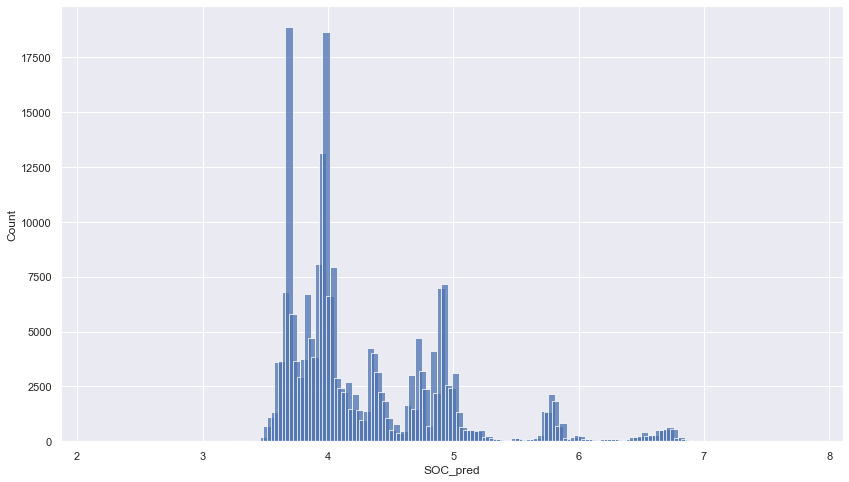

In [208]:
import seaborn as sns 
sns.histplot(x = "SOC_pred", data = arable_estsoil, multiple ="stack", shrink =2) #element = step,poly
sns.set(rc={'figure.figsize':(12,8)})

In [62]:
arable_estsoil["SOC_pred"].min()


2.1719489887809678

In [63]:
arable_estsoil["SOC_pred"].max()

7.80676510005815

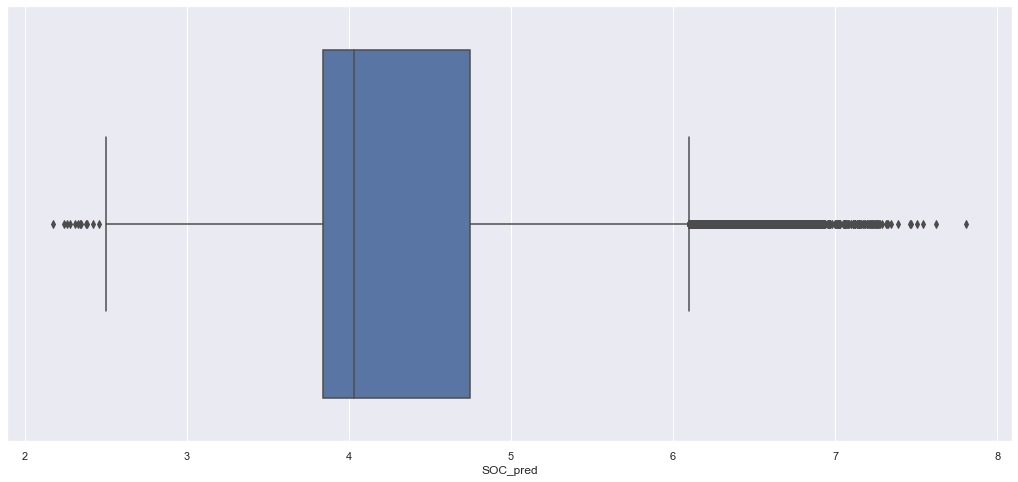

In [64]:
ax = sns.boxplot(x="SOC_pred", data=arable_estsoil)
sns.set(rc={'figure.figsize':(13,8)})

<h1>Forest<h1>

In [65]:
#Splitting data for machine learning

forest = forest.drop(["landuse","grassland_pct",
"forest_pct",
"arable_pct",
"area_grassland",
"area_forest",
"area_drain",
"other_pct",
"urban_pct",
"area_other",
"area_arable",
"area_wetland",
"wetland_pct",
"drain_pct",
"area_urban",
"water_pct",
"area_water"], axis =1)

y = np.array(forest['SOC_mean'])

x = forest.drop(['SOC_mean'], axis =1)


#Checking the shapes of data

print(f'x : {x.shape}')
print(f'y : {y.shape}')

x : (295, 16)
y : (295,)


In [66]:
forest.columns


Index(['sand1', 'silt1', 'clay1', 'rock1', 'SOC_mean', 'slp_mean',
       'slp_median', 'slp_stdev', 'twi_mean', 'twi_median', 'twi_stdev',
       'ls_mean', 'ls_median', 'ls_stdev', 'tri_mean', 'tri_median',
       'tri_stdev'],
      dtype='object')

In [67]:
#splitting data into test and train set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 101)

In [68]:
print(f'x_train : {x_train.shape}')
print(f'y_tain : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')


x_train : (236, 16)
y_tain : (236,)
x_test : (59, 16)
y_test : (59,)


In [69]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor 
randomforest = RandomForestRegressor()

In [70]:
rfe_forest = RFE(estimator=randomforest, step=1)
rfe_forest = rfe_forest.fit(x_train,y_train)

In [71]:
forest_rfe_features = pd.DataFrame({"Feature":list(x_train.columns),
                                     "Ranking": rfe_forest.ranking_})
forest_rfe_features.sort_values(by="Ranking")

,Feature,Ranking
0,sand1,1
2,clay1,1
3,rock1,1
7,twi_mean,1
9,twi_stdev,1
12,ls_stdev,1
14,tri_median,1
15,tri_stdev,1
11,ls_median,2
6,slp_stdev,3


In [72]:
fr_x_train_rfe = rfe_forest.transform(x_train)
fr_x_test_rfe = rfe_forest.transform(x_test)


In [73]:
fr_fin_rfe_model =  randomforest.fit(fr_x_train_rfe,y_train)

In [74]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {randomforest.score(fr_x_train_rfe,y_train):.3f}')
print (f'Test Accuracy - : {randomforest.score(fr_x_test_rfe,y_test):.3f}')


Train Accuracy - : 0.919
Test Accuracy - : 0.394


In [75]:
y_predict_train = fr_fin_rfe_model.predict((fr_x_train_rfe))

In [76]:
#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics

r_square_train = metrics.r2_score(y_train, y_predict_train)
print('R-Square Error associated with Random Forest Regression is: %.2f'%r_square_train)

R-Square Error associated with Random Forest Regression is: 0.92


In [77]:
#Mean absolute error evaluation
from sklearn.metrics import mean_absolute_error

print("The MAE is: %.2f" % mean_absolute_error(y_train, y_predict_train)) 

The MAE is: 1.04


In [78]:
from sklearn.metrics import mean_squared_error
#Mean square error evaluation

print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_train, y_predict_train)))

rmsep = np.sqrt(np.mean(np.square(((y_train - y_predict_train) / y_train)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep)

Root Mean Squared Error associated with Random Forest Regression is: 1.59
Root Mean Squared Error in percentage: 1.75


In [79]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_train, y_predict_train))  

The EVS is: 0.92



 <h1>Test Model Evaluation<h1>

In [80]:
y_predict_test = fr_fin_rfe_model.predict(fr_x_test_rfe)


In [81]:
#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics

In [82]:
r_square = metrics.r2_score(y_test, y_predict_test)
print('R-Square Error associated with Random Forest Regression is: %.2f'%r_square)

R-Square Error associated with Random Forest Regression is: 0.39


In [83]:
#Mean absolute error evaluation
from sklearn.metrics import mean_absolute_error

print("The MAE is: %.2f" % mean_absolute_error(y_test, y_predict_test)) 

The MAE is: 3.01


In [84]:
from sklearn.metrics import mean_squared_error
#Mean square error evaluation

In [85]:
print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_test, y_predict_test)))

rmsep = np.sqrt(np.mean(np.square(((y_test - y_predict_test) / y_test)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep)

Root Mean Squared Error associated with Random Forest Regression is: 4.69
Root Mean Squared Error in percentage: 3.52


In [86]:

#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

In [87]:
print("The EVS is: %.2f" % explained_variance_score(y_test, y_predict_test))  

The EVS is: 0.40


<h1>Forest on Final <h1>

In [88]:
forest_estsoil = estsoil.loc[estsoil['landuse'] == "forest"]

In [89]:
forest_estsoil

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,est_crs1,sand1,silt1,clay1,rock1,k1,awc1,z2,est_txt2,lxtype2,est_crs2,sand2,silt2,clay2,rock2,k2,awc2,z3,est_txt3,lxtype3,est_crs3,sand3,silt3,clay3,rock3,k3,awc3,z4,est_txt4,lxtype4,est_crs4,sand4,silt4,clay4,rock4,k4,awc4,unit_area,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arabl,arable_pct,area_forest,forest_pct,area_grass,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry,landuse
1,1,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.190833,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1042.409646,0.168890,0.141488,0.106648,8.267109,8.226672,0.818133,1.802826,1.430442,1.305622,0.154712,0.000000,0.215726,0.0,0.000,0.000000,0.000000,1042.409646,100.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((668432.067 6543565.911, 668425.630 6...",forest
5,5,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.188333,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,4649.640163,0.758535,0.660990,0.457811,6.269014,6.258756,1.306534,9.910546,8.545395,6.560650,2.028976,1.462374,2.308224,50.0,1.075,0.000000,0.000000,2451.064996,52.715155,2140.186683,46.029082,0.000000,0.000000,0.00000,0.000000,58.388484,1.255764,0.000000,0.000000,"POLYGON ((677015.810 6548550.780, 677015.910 6...",forest
10,10,Ag,FL-gln,FL,krl/s,2.0,1000.0,500.0,l,S,kr,90,5,5,85,133.21,0.197500,1000.0,s,C,None,25.0,30.0,45.0,0.0,4.29,0.190000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,910.241700,0.706401,0.650608,0.493948,6.074810,5.994873,2.145824,8.692708,8.002242,6.105497,0.221623,0.000000,0.416500,0.0,0.000,0.000000,0.000000,909.628233,99.932604,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.613467,0.067396,0.000000,0.000000,"POLYGON ((656080.560 6598407.280, 656088.340 6...",forest
11,11,Ag,FL-gln,FL,krl/s,2.0,1000.0,500.0,l,S,kr,90,5,5,85,133.21,0.197500,1000.0,s,C,None,25.0,30.0,45.0,0.0,4.29,0.190000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,5940.360457,0.425528,0.247605,0.381344,7.177783,7.280802,1.496521,5.642649,3.589366,4.995359,0.712425,0.337849,0.935408,0.0,0.000,0.000000,0.000000,3091.885505,52.048786,2591.982440,43.633420,0.000000,0.000000,0.00000,0.000000,256.492511,4.317794,0.000000,0.000000,"POLYGON ((656165.030 6598401.410, 656182.320 6...",forest
12,12,Ag,FL-gln,FL,krl/s,2.0,1000.0,500.0,l,S,kr,90,5,5,85,133.21,0.197500,1000.0,s,C,None,25.0,30.0,45.0,0.0,4.29,0.190000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,728.499800,0.349847,0.362381,0.223642,7.480827,7.211145,1.257962,4.308912,4.322076,2.827567,0.242716,0.000000,0.406632,0.0,0.000,0.000000,0.000000,728.499800,100.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((656165.030 6598401.410, 656159.840 6...",forest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745409,745436,TxM,HS-sa-qt,HS,t₃,1.0,1000.0,1000.0,t3,PEAT,None,15,15,70,0,9.20,0.190833,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,28022.226250,0.200193,0.151522,0.176378,8.491594,8.449724,1.032944,1.865549,1.421256,1.621408,0.115474,0.000000,0.173229,1107.0,3.950,0.000000,0.000000,24001.032865,85.649986,468.379591,1.671457,0.000000,0.0

In [90]:
forest_estsoil = forest_estsoil[[
 
"sand1",
"clay1",
"twi_median",
"twi_stdev",
"ls_mean",
"ls_stdev",
"tri_median",
"tri_stdev"
    ]]
                                 

In [91]:
#analyzing "object" type columns
forest_estsoil.select_dtypes(include=["object"])

""
1
5
10
11
12
...
745409
745411
745413
745417


In [92]:
#checking null values
forest_estsoil.isnull().sum()

sand1         0
clay1         0
twi_median    0
twi_stdev     0
ls_mean       0
ls_stdev      0
tri_median    0
tri_stdev     0
dtype: int64

In [93]:
forest_estsoil.shape

(416543, 8)

In [94]:
# running model on final data
values = forest_estsoil.values

display(values.shape)
Prediction = fr_fin_rfe_model.predict(values)

forest_estsoil['SOC_pred'] = Prediction

display(forest_estsoil.sample(10))

(416543, 8)

C:\Users\y.Israfilbayov\AppData\Local\Temp\ipykernel_18876\2119702147.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_estsoil['SOC_pred'] = Prediction


,sand1,clay1,twi_median,twi_stdev,ls_mean,ls_stdev,tri_median,tri_stdev,SOC_pred
697051,15,70,0.917466,9.157084,0.191271,0.109504,0.096893,0.131797,27.228057
429629,90,7,0.876398,9.066454,0.073243,0.000000,0.088954,0.080409,2.659021
413291,90,5,0.926481,8.694441,0.091070,0.000000,0.073497,0.112411,2.750385
492666,90,5,1.703058,4.714311,2.396752,1.113122,0.469004,0.769263,3.762611
709831,15,70,1.467533,10.305155,0.308956,0.202944,0.139804,0.051278,25.779294
452945,90,5,0.817439,8.481692,0.065308,0.000000,0.081741,0.115658,2.636460
506354,90,5,0.874400,9.461432,0.200046,0.131822,0.087632,0.104749,10.179786
511059,90,7,1.058427,10.064485,0.042059,0.000000,0.090092,0.046798,3.711548
440739,90,5,0.721592,9.958700,0.043361,0.000000,0.063693,0.041292,4.344234
61767,82,9,0.875093,5.941832,1.901635,1.451106,0.188523,0.391126,8.822635


In [95]:
end_forest_estsoil = end_estsoil.loc[end_estsoil['landuse'] == "forest"]

In [96]:
end_forest_estsoil['SOC_pred'] = Prediction

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [97]:
end_forest_estsoil

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,est_crs1,sand1,silt1,clay1,rock1,k1,awc1,z2,est_txt2,lxtype2,est_crs2,sand2,silt2,clay2,rock2,k2,awc2,z3,est_txt3,lxtype3,est_crs3,sand3,silt3,clay3,rock3,k3,awc3,z4,est_txt4,lxtype4,est_crs4,sand4,silt4,clay4,rock4,k4,awc4,unit_area,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arabl,arable_pct,area_forest,forest_pct,area_grass,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry,landuse,SOC_pred
1,1,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.190833,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1042.409646,0.168890,0.141488,0.106648,8.267109,8.226672,0.818133,1.802826,1.430442,1.305622,0.154712,0.000000,0.215726,0.0,0.000,0.000000,0.000000,1042.409646,100.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((668432.067 6543565.911, 668425.630 6...",forest,2.250369
5,5,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.188333,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,4649.640163,0.758535,0.660990,0.457811,6.269014,6.258756,1.306534,9.910546,8.545395,6.560650,2.028976,1.462374,2.308224,50.0,1.075,0.000000,0.000000,2451.064996,52.715155,2140.186683,46.029082,0.000000,0.000000,0.00000,0.000000,58.388484,1.255764,0.000000,0.000000,"POLYGON ((677015.810 6548550.780, 677015.910 6...",forest,3.535962
10,10,Ag,FL-gln,FL,krl/s,2.0,1000.0,500.0,l,S,kr,90,5,5,85,133.21,0.197500,1000.0,s,C,None,25.0,30.0,45.0,0.0,4.29,0.190000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,910.241700,0.706401,0.650608,0.493948,6.074810,5.994873,2.145824,8.692708,8.002242,6.105497,0.221623,0.000000,0.416500,0.0,0.000,0.000000,0.000000,909.628233,99.932604,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.613467,0.067396,0.000000,0.000000,"POLYGON ((656080.560 6598407.280, 656088.340 6...",forest,1.736163
11,11,Ag,FL-gln,FL,krl/s,2.0,1000.0,500.0,l,S,kr,90,5,5,85,133.21,0.197500,1000.0,s,C,None,25.0,30.0,45.0,0.0,4.29,0.190000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,5940.360457,0.425528,0.247605,0.381344,7.177783,7.280802,1.496521,5.642649,3.589366,4.995359,0.712425,0.337849,0.935408,0.0,0.000,0.000000,0.000000,3091.885505,52.048786,2591.982440,43.633420,0.000000,0.000000,0.00000,0.000000,256.492511,4.317794,0.000000,0.000000,"POLYGON ((656165.030 6598401.410, 656182.320 6...",forest,9.539604
12,12,Ag,FL-gln,FL,krl/s,2.0,1000.0,500.0,l,S,kr,90,5,5,85,133.21,0.197500,1000.0,s,C,None,25.0,30.0,45.0,0.0,4.29,0.190000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,728.499800,0.349847,0.362381,0.223642,7.480827,7.211145,1.257962,4.308912,4.322076,2.827567,0.242716,0.000000,0.406632,0.0,0.000,0.000000,0.000000,728.499800,100.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((656165.030 6598401.410, 656159.840 6...",forest,4.015663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745409,745436,TxM,HS-sa-qt,HS,t₃,1.0,1000.0,1000.0,t3,PEAT,None,15,15,70,0,9.20,0.190833,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,28022.226250,0.200193,0.151522,0.176378,8.491594,8.449724,1.032944,1.865549,1.421256,1.621408,0.115474,0.000000,0.173229,1107.0,3.950,0.000000,0.0000

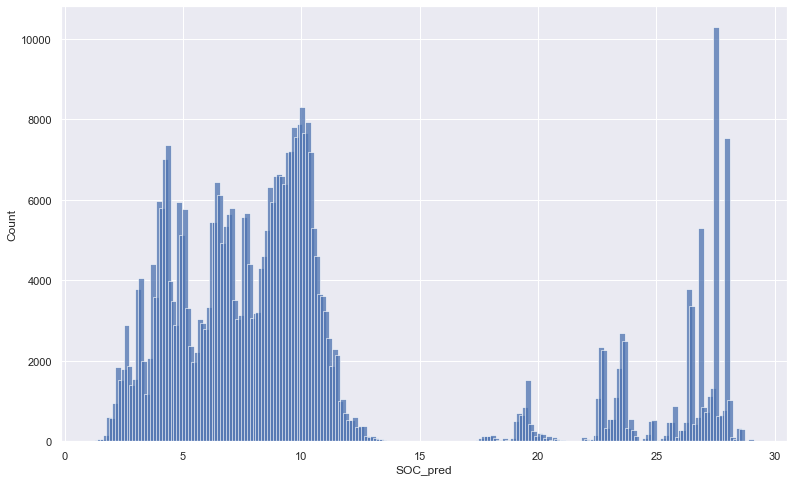

In [98]:
import seaborn as sns 
sns.histplot(x = "SOC_pred", data = forest_estsoil, multiple ="stack", shrink =2) #element = step,poly
sns.set(rc={'figure.figsize':(15,7)})

In [99]:
forest_estsoil["SOC_pred"].min()


1.3123432781941207

In [100]:
forest_estsoil["SOC_pred"].max()

29.0503480278422

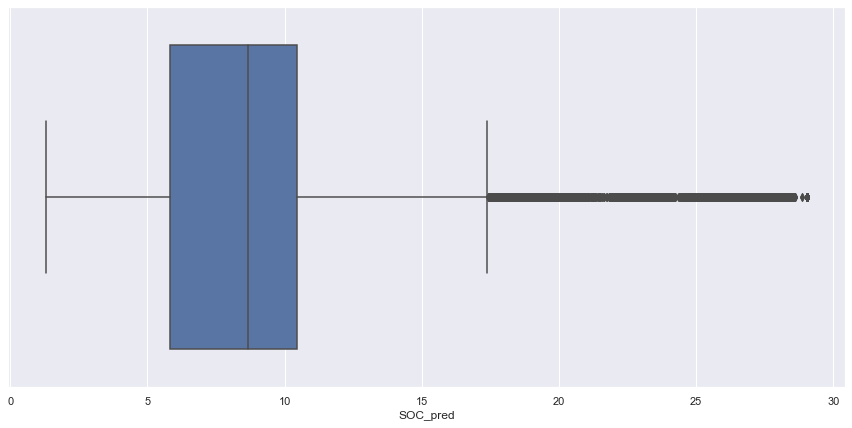

In [101]:
ax = sns.boxplot(x="SOC_pred", data=forest_estsoil)
sns.set(rc={'figure.figsize':(13,8)})

<h1> Wetland <h1>

In [102]:
wetland = landuse.loc[landuse['landuse'] == "wetland"]

In [103]:
wetland.shape

(35, 34)

In [104]:
#Splitting data for machine learning

wetland = wetland.drop(["landuse","grassland_pct",
"forest_pct",
"arable_pct",
"area_grassland",
"area_forest",
"area_drain",
"other_pct",
"urban_pct",
"area_other",
"area_arable",
"area_wetland",
"wetland_pct",
"drain_pct",
"area_urban",
"water_pct",
"area_water"], axis =1)

y = np.array(wetland['SOC_mean'])

x = wetland.drop(['SOC_mean'], axis =1)


#Checking the shapes of data

print(f'x : {x.shape}')
print(f'y : {y.shape}')

x : (35, 16)
y : (35,)


In [105]:
wetland.columns

Index(['sand1', 'silt1', 'clay1', 'rock1', 'SOC_mean', 'slp_mean',
       'slp_median', 'slp_stdev', 'twi_mean', 'twi_median', 'twi_stdev',
       'ls_mean', 'ls_median', 'ls_stdev', 'tri_mean', 'tri_median',
       'tri_stdev'],
      dtype='object')

In [106]:
#splitting data into test and train set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 101)

In [107]:
print(f'x_train : {x_train.shape}')
print(f'y_tain : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')


x_train : (28, 16)
y_tain : (28,)
x_test : (7, 16)
y_test : (7,)


In [108]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor 
randomforest = RandomForestRegressor()

In [109]:
rfe_forest = RFE(estimator=randomforest, step=1)
rfe_forest = rfe_forest.fit(x_train,y_train)

In [110]:
forest_rfe_features = pd.DataFrame({"Feature":list(x_train.columns),
                                     "Ranking": rfe_forest.ranking_})
forest_rfe_features.sort_values(by="Ranking")

,Feature,Ranking
6,slp_stdev,1
7,twi_mean,1
8,twi_median,1
9,twi_stdev,1
11,ls_median,1
12,ls_stdev,1
14,tri_median,1
15,tri_stdev,1
10,ls_mean,2
5,slp_median,3


In [111]:
fr_x_train_rfe = rfe_forest.transform(x_train)
fr_x_test_rfe = rfe_forest.transform(x_test)


In [112]:
fr_fin_rfe_model =  randomforest.fit(fr_x_train_rfe,y_train)

In [113]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {randomforest.score(fr_x_train_rfe,y_train):.3f}')
print (f'Test Accuracy - : {randomforest.score(fr_x_test_rfe,y_test):.3f}')

Train Accuracy - : 0.815
Test Accuracy - : -3.286


In [114]:
y_predict_train = fr_fin_rfe_model.predict((fr_x_train_rfe))

In [115]:
#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics

r_square_train = metrics.r2_score(y_train, y_predict_train)
print('R-Square Error associated with Random Forest Regression is: %.2f'%r_square_train)

R-Square Error associated with Random Forest Regression is: 0.82


In [116]:
#Mean absolute error evaluation
from sklearn.metrics import mean_absolute_error

print("The MAE is: %.2f" % mean_absolute_error(y_train, y_predict_train)) 

The MAE is: 0.71


In [117]:
from sklearn.metrics import mean_squared_error
#Mean square error evaluation

print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_train, y_predict_train)))

rmsep = np.sqrt(np.mean(np.square(((y_train - y_predict_train) / y_train)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep)

Root Mean Squared Error associated with Random Forest Regression is: 0.90
Root Mean Squared Error in percentage: 0.03


In [118]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_train, y_predict_train))  

The EVS is: 0.82



 <h1>Test Model Evaluation<h1>

In [119]:
y_predict_test = fr_fin_rfe_model.predict(fr_x_test_rfe)

In [120]:
#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics

In [121]:
r_square = metrics.r2_score(y_test, y_predict_test)
print('R-Square Error associated with Random Forest Regression is: %.2f'%r_square)

R-Square Error associated with Random Forest Regression is: -3.29


In [122]:
#Mean absolute error evaluation
from sklearn.metrics import mean_absolute_error

print("The MAE is: %.2f" % mean_absolute_error(y_test, y_predict_test)) 

The MAE is: 1.68


In [123]:
from sklearn.metrics import mean_squared_error
#Mean square error evaluation

In [124]:
print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_test, y_predict_test)))

rmsep = np.sqrt(np.mean(np.square(((y_test - y_predict_test) / y_test)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep)

Root Mean Squared Error associated with Random Forest Regression is: 1.90
Root Mean Squared Error in percentage: 0.06


In [125]:

#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

In [126]:
print("The EVS is: %.2f" % explained_variance_score(y_test, y_predict_test))  

The EVS is: 0.06


<h1> Wetland final <h1>

In [127]:
wetland_estsoil = estsoil.loc[estsoil['landuse'] == "wetland"]

In [128]:
wetland_estsoil

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,est_crs1,sand1,silt1,clay1,rock1,k1,awc1,z2,est_txt2,lxtype2,est_crs2,sand2,silt2,clay2,rock2,k2,awc2,z3,est_txt3,lxtype3,est_crs3,sand3,silt3,clay3,rock3,k3,awc3,z4,est_txt4,lxtype4,est_crs4,sand4,silt4,clay4,rock4,k4,awc4,unit_area,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arabl,arable_pct,area_forest,forest_pct,area_grass,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry,landuse
13,13,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.193333,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,3.528082e+03,0.211098,0.182614,0.139051,9.361248,9.308703,1.323082,2.393280,1.703896,1.758273,0.068300,0.000000,0.115378,0.0,0.000,0.0,0.0,1.445505e+01,0.409714,0.000000,0.000000,2.896202e+03,82.089979,0.00000,0.000000,617.425166,17.500307,0.000000e+00,0.000000,"POLYGON ((707999.000 6415410.650, 708001.490 6...",wetland
145,145,Ag,FL-gln,FL,sl/ls₂,2.0,1000.0,500.0,sl,LS,None,82,9,9,0,37.54,0.202500,1000.0,ls2,L,None,55.0,30.0,15.0,0.0,9.04,0.200000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,2.802268e+03,0.303195,0.259387,0.199228,8.919357,9.056973,0.887850,3.548786,3.000471,2.456898,0.167222,0.000000,0.201301,0.0,0.000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,2.514125e+03,89.717518,0.00000,0.000000,288.142736,10.282482,0.000000e+00,0.000000,"POLYGON ((622386.100 6422415.420, 622390.198 6...",wetland
175,175,Ag,FL-gln,FL,sl40/ls₂,2.0,1000.0,400.0,sl,LS,None,82,9,9,0,37.54,0.192500,1000.0,ls2,L,None,55.0,30.0,15.0,0.0,9.04,0.182500,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,7.309353e+03,0.187446,0.165759,0.133312,10.212000,9.958507,1.050705,2.259915,1.895498,1.821021,0.096177,0.000000,0.153536,0.0,0.000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,6.600009e+03,90.295400,0.00000,0.000000,709.343444,9.704600,0.000000e+00,0.000000,"POLYGON ((622053.648 6423789.689, 622057.710 6...",wetland
176,176,Ag,FL-gln,FL,sl40/ls₂,2.0,1000.0,400.0,sl,LS,None,82,9,9,0,37.54,0.193125,1000.0,ls2,L,None,55.0,30.0,15.0,0.0,9.04,0.185000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,9.829607e+03,0.153163,0.131190,0.096715,10.826686,10.740040,0.798570,1.803559,1.486849,1.284071,0.147107,0.084104,0.178830,0.0,0.000,0.0,0.0,3.988801e+02,4.057945,0.000000,0.000000,8.931223e+03,90.860427,0.00000,0.000000,499.504045,5.081628,0.000000e+00,0.000000,"POLYGON ((621945.060 6423857.680, 621942.272 6...",wetland
179,179,Ag,FL-gln,FL,sl50-70/ls₂,2.0,1000.0,600.0,sl,LS,None,82,9,9,0,37.54,0.198000,1000.0,ls2,L,None,55.0,30.0,15.0,0.0,9.04,0.187500,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,5.594190e+03,0.229987,0.225810,0.115760,8.845193,8.652981,0.835845,3.031060,2.869558,1.713161,0.157959,0.000000,0.240496,0.0,0.000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,5.259117e+03,94.010349,0.00000,0.000000,335.072442,5.989651,0.000000e+00,0.000000,"POLYGON ((622157.820 6423198.260, 622153.100 6...",wetland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745412,745439,TxM,HS-sa-qt,HS,t₃150,1.0,1500.0,1500.0,t3,PEAT,None,15,15,70,0,9.20,0.198956,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1.281053e+07,0.290027,0.122151,0.505173,8.615058,8.691366,2.328307,3.743900,1.482574,6.731262,0.973204,0.000000,3.717936,48577.0,0.379,0.0,0.0,3.

In [129]:
wetland_estsoil = wetland_estsoil[[
                                
"slp_stdev",
"twi_mean",
"twi_median",
"twi_stdev",
"ls_median",
"ls_stdev",
"tri_median",
"tri_stdev"                                     
                                
                                ]]
                                 

In [130]:
#analyzing "object" type columns
wetland_estsoil.select_dtypes(include=["object"])

""
13
145
175
176
179
...
745412
745414
745415
745416


In [131]:
#checking null values
wetland_estsoil.isnull().sum()

slp_stdev     0
twi_mean      0
twi_median    0
twi_stdev     0
ls_median     0
ls_stdev      0
tri_median    0
tri_stdev     0
dtype: int64

In [132]:
wetland_estsoil.shape

(16958, 8)

In [133]:
# running model on final data
values = wetland_estsoil.values

display(values.shape)
Prediction = fr_fin_rfe_model.predict(values)

wetland_estsoil['SOC_pred'] = Prediction

display(wetland_estsoil.sample(10))

(16958, 8)

C:\Users\y.Israfilbayov\AppData\Local\Temp\ipykernel_18876\409699501.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wetland_estsoil['SOC_pred'] = Prediction


,slp_stdev,twi_mean,twi_median,twi_stdev,ls_median,ls_stdev,tri_median,tri_stdev,SOC_pred
659755,1.538990,9.878778,1.105234,9.909616,0.479223,0.294165,0.121841,0.142302,28.982476
653866,2.283067,8.179813,0.884674,8.225859,0.162433,0.168792,0.084501,0.160954,28.841345
730409,0.282860,9.866368,0.751120,9.951620,0.085397,0.000000,0.048984,0.036836,28.687861
686551,0.163574,11.908962,0.419344,11.911966,0.047298,0.000000,0.013511,0.024594,28.750645
13893,0.218756,12.035953,0.500333,12.034909,0.056137,0.000000,0.017174,0.027297,28.578951
176626,0.610524,10.234668,1.462205,10.594975,0.197585,0.131585,0.118288,0.059082,28.810423
655102,5.070635,9.070085,1.696725,8.506835,0.649732,0.608793,0.179356,0.407277,28.824610
723073,0.302734,11.512434,0.530041,11.478851,0.098081,0.000000,0.015477,0.030506,28.566982
737446,0.277911,10.621098,0.558192,10.630324,0.059190,0.000000,0.020960,0.037290,28.725099
654664,0.296636,11.435756,0.815105,11.482175,0.116191,0.118289,0.061319,0.037146,28.988760


In [134]:
end_wetland_estsoil = end_estsoil.loc[end_estsoil['landuse'] == "wetland"]

In [135]:
end_wetland_estsoil['SOC_pred'] = Prediction

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [136]:
end_wetland_estsoil

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,est_crs1,sand1,silt1,clay1,rock1,k1,awc1,z2,est_txt2,lxtype2,est_crs2,sand2,silt2,clay2,rock2,k2,awc2,z3,est_txt3,lxtype3,est_crs3,sand3,silt3,clay3,rock3,k3,awc3,z4,est_txt4,lxtype4,est_crs4,sand4,silt4,clay4,rock4,k4,awc4,unit_area,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arabl,arable_pct,area_forest,forest_pct,area_grass,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry,landuse,SOC_pred
13,13,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.193333,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,3.528082e+03,0.211098,0.182614,0.139051,9.361248,9.308703,1.323082,2.393280,1.703896,1.758273,0.068300,0.000000,0.115378,0.0,0.000,0.0,0.0,1.445505e+01,0.409714,0.000000,0.000000,2.896202e+03,82.089979,0.00000,0.000000,617.425166,17.500307,0.000000e+00,0.000000,"POLYGON ((707999.000 6415410.650, 708001.490 6...",wetland,28.646019
145,145,Ag,FL-gln,FL,sl/ls₂,2.0,1000.0,500.0,sl,LS,None,82,9,9,0,37.54,0.202500,1000.0,ls2,L,None,55.0,30.0,15.0,0.0,9.04,0.200000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,2.802268e+03,0.303195,0.259387,0.199228,8.919357,9.056973,0.887850,3.548786,3.000471,2.456898,0.167222,0.000000,0.201301,0.0,0.000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,2.514125e+03,89.717518,0.00000,0.000000,288.142736,10.282482,0.000000e+00,0.000000,"POLYGON ((622386.100 6422415.420, 622390.198 6...",wetland,28.830738
175,175,Ag,FL-gln,FL,sl40/ls₂,2.0,1000.0,400.0,sl,LS,None,82,9,9,0,37.54,0.192500,1000.0,ls2,L,None,55.0,30.0,15.0,0.0,9.04,0.182500,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,7.309353e+03,0.187446,0.165759,0.133312,10.212000,9.958507,1.050705,2.259915,1.895498,1.821021,0.096177,0.000000,0.153536,0.0,0.000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,6.600009e+03,90.295400,0.00000,0.000000,709.343444,9.704600,0.000000e+00,0.000000,"POLYGON ((622053.648 6423789.689, 622057.710 6...",wetland,28.441509
176,176,Ag,FL-gln,FL,sl40/ls₂,2.0,1000.0,400.0,sl,LS,None,82,9,9,0,37.54,0.193125,1000.0,ls2,L,None,55.0,30.0,15.0,0.0,9.04,0.185000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,9.829607e+03,0.153163,0.131190,0.096715,10.826686,10.740040,0.798570,1.803559,1.486849,1.284071,0.147107,0.084104,0.178830,0.0,0.000,0.0,0.0,3.988801e+02,4.057945,0.000000,0.000000,8.931223e+03,90.860427,0.00000,0.000000,499.504045,5.081628,0.000000e+00,0.000000,"POLYGON ((621945.060 6423857.680, 621942.272 6...",wetland,29.054209
179,179,Ag,FL-gln,FL,sl50-70/ls₂,2.0,1000.0,600.0,sl,LS,None,82,9,9,0,37.54,0.198000,1000.0,ls2,L,None,55.0,30.0,15.0,0.0,9.04,0.187500,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,5.594190e+03,0.229987,0.225810,0.115760,8.845193,8.652981,0.835845,3.031060,2.869558,1.713161,0.157959,0.000000,0.240496,0.0,0.000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,5.259117e+03,94.010349,0.00000,0.000000,335.072442,5.989651,0.000000e+00,0.000000,"POLYGON ((622157.820 6423198.260, 622153.100 6...",wetland,28.731590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745412,745439,TxM,HS-sa-qt,HS,t₃150,1.0,1500.0,1500.0,t3,PEAT,None,15,15,70,0,9.20,0.198956,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1.281053e+07,0.290027,0.122151,0.505173,8.615058,8.691366,2.328307,3.743900,1.4825

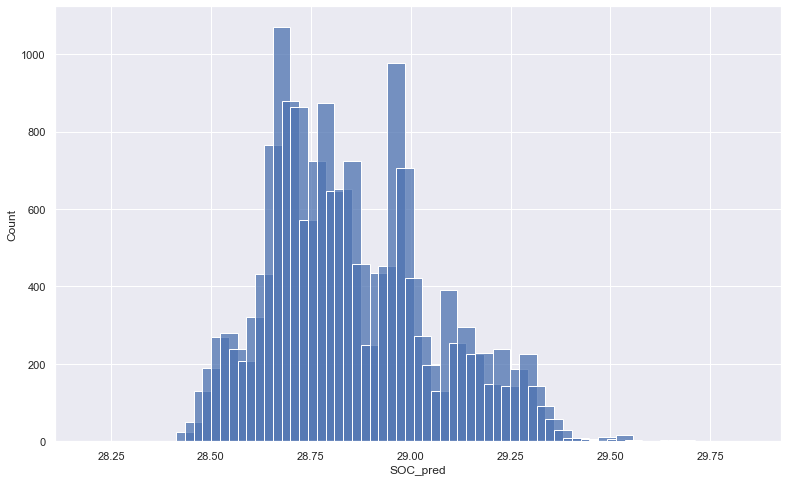

In [137]:
import seaborn as sns 
sns.histplot(x = "SOC_pred", data = wetland_estsoil, multiple ="stack", shrink =2) #element = step,poly
sns.set(rc={'figure.figsize':(15,7)})

In [138]:
wetland_estsoil["SOC_pred"].min()


28.20385655527767

In [139]:
wetland_estsoil["SOC_pred"].max()

29.832344366770123

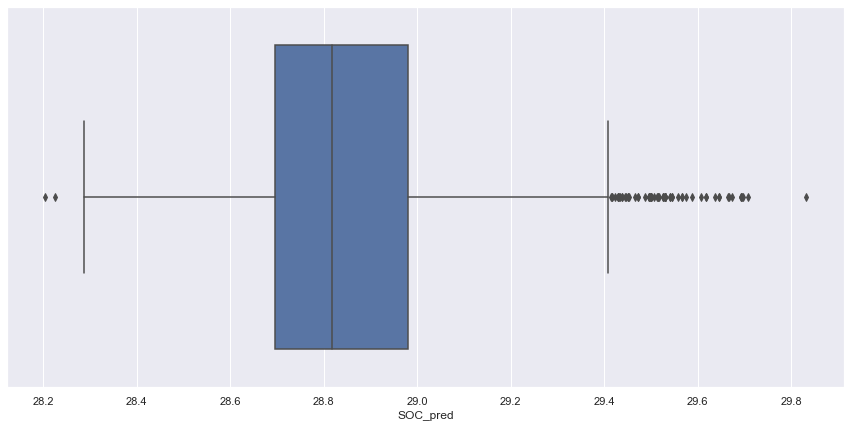

In [140]:
ax = sns.boxplot(x="SOC_pred", data=wetland_estsoil)
sns.set(rc={'figure.figsize':(13,8)})

<h1> other <h1>

In [141]:
#Splitting data for machine learning

other = other.drop(["landuse","grassland_pct",
"forest_pct",
"arable_pct",
"area_grassland",
"area_forest",
"area_drain",
"other_pct",
"urban_pct",
"area_other",
"area_arable",
"area_wetland",
"wetland_pct",
"drain_pct",
"area_urban",
"water_pct",
"area_water"], axis =1)

y = np.array(other['SOC_mean'])

x = other.drop(['SOC_mean'], axis =1)


#Checking the shapes of data

print(f'x : {x.shape}')
print(f'y : {y.shape}')

x : (4, 16)
y : (4,)


In [142]:
urban.columns

Index(['sand1', 'silt1', 'clay1', 'rock1', 'SOC_mean', 'slp_mean',
       'slp_median', 'slp_stdev', 'twi_mean', 'twi_median', 'twi_stdev',
       'ls_mean', 'ls_median', 'ls_stdev', 'tri_mean', 'tri_median',
       'tri_stdev', 'area_drain', 'drain_pct', 'area_arable', 'area_forest',
       'area_grassland', 'area_wetland', 'area_urban', 'area_water',
       'area_other', 'arable_pct', 'forest_pct', 'grassland_pct',
       'wetland_pct', 'urban_pct', 'water_pct', 'other_pct', 'landuse'],
      dtype='object')

In [143]:
#splitting data into test and train set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 101)

In [144]:
print(f'x_train : {x_train.shape}')
print(f'y_tain : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (3, 16)
y_tain : (3,)
x_test : (1, 16)
y_test : (1,)


In [145]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor 
randomforest = RandomForestRegressor()

In [146]:
rfe_arable = RFE(estimator=randomforest, step=1)
rfe_arable = rfe_arable.fit(x_train,y_train)

In [147]:
arable_rfe_features = pd.DataFrame({"Feature":list(x_train.columns),
                                     "Ranking": rfe_arable.ranking_})
arable_rfe_features.sort_values(by="Ranking")

,Feature,Ranking
0,sand1,1
3,rock1,1
7,twi_mean,1
8,twi_median,1
9,twi_stdev,1
11,ls_median,1
12,ls_stdev,1
15,tri_stdev,1
5,slp_median,2
6,slp_stdev,3


In [148]:
ar_x_train_rfe = rfe_arable.transform(x_train)
ar_x_test_rfe = rfe_arable.transform(x_test)

In [149]:
ar_fin_rfe_model =  randomforest.fit(ar_x_train_rfe,y_train)

In [150]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {randomforest.score(ar_x_train_rfe,y_train):.3f}')
print (f'Test Accuracy - : {randomforest.score(ar_x_test_rfe,y_test):.3f}')

Train Accuracy - : 0.738
Test Accuracy - : nan


C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [151]:
y_predict_train = ar_fin_rfe_model.predict((ar_x_train_rfe))

In [152]:
#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics

r_square_train = metrics.r2_score(y_train, y_predict_train)
print('R-Square Error associated with Random Forest Regression is: %.2f'%r_square_train)

R-Square Error associated with Random Forest Regression is: 0.74


In [153]:
#Mean absolute error evaluation
from sklearn.metrics import mean_absolute_error

print("The MAE is: %.2f" % mean_absolute_error(y_train, y_predict_train))    

The MAE is: 0.67


In [154]:
from sklearn.metrics import mean_squared_error
#Mean square error evaluation

print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_train, y_predict_train)))

rmsep = np.sqrt(np.mean(np.square(((y_train - y_predict_train) / y_train)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep)

Root Mean Squared Error associated with Random Forest Regression is: 0.72
Root Mean Squared Error in percentage: 0.14


In [155]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_train, y_predict_train))  

The EVS is: 0.74


In [156]:
y_predict_test = ar_fin_rfe_model.predict(ar_x_test_rfe)

In [157]:
#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics

r_square = metrics.r2_score(y_test, y_predict_test)
print('R-Square Error associated with Random Forest Regression is: %.2f'%r_square)

R-Square Error associated with Random Forest Regression is: nan


C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [158]:
#Mean absolute error evaluation
from sklearn.metrics import mean_absolute_error

print("The MAE is: %.2f" % mean_absolute_error(y_test, y_predict_test))      

The MAE is: 1.55


In [159]:
from sklearn.metrics import mean_squared_error
#Mean square error evaluation

print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_test, y_predict_test)))

rmsep = np.sqrt(np.mean(np.square(((y_test - y_predict_test) / y_test)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep)

Root Mean Squared Error associated with Random Forest Regression is: 1.55
Root Mean Squared Error in percentage: 0.28


In [160]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_test, y_predict_test))   

The EVS is: 1.00


<h1> other on final <h1>

In [161]:
other_estsoil = estsoil.loc[estsoil['landuse'] == "other"]

In [162]:
other_estsoil

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,est_crs1,sand1,silt1,clay1,rock1,k1,awc1,z2,est_txt2,lxtype2,est_crs2,sand2,silt2,clay2,rock2,k2,awc2,z3,est_txt3,lxtype3,est_crs3,sand3,silt3,clay3,rock3,k3,awc3,z4,est_txt4,lxtype4,est_crs4,sand4,silt4,clay4,rock4,k4,awc4,unit_area,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arabl,arable_pct,area_forest,forest_pct,area_grass,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry,landuse
8,8,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.196667,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,5.378790e+02,0.373342,0.186110,0.335591,7.691676,7.788132,1.388768,4.788413,2.501182,4.776642,0.791443,0.297278,1.027169,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.619778,9.039167,4.892592e+02,90.960833,"POLYGON ((720805.630 6576108.300, 720788.250 6...",other
41,41,Ag,FL-gln,FL,l/tls,2.0,1000.0,500.0,l,S,None,90,5,5,0,133.21,0.200000,1000.0,tls,SiL,None,35.0,50.0,15.0,0.0,8.89,0.2000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,2.854298e+02,0.909488,1.125516,0.455902,6.815243,6.189728,1.566736,10.888715,12.359543,5.382188,1.386189,1.358916,0.547499,0.0,0.000,0.000000,0.000000,35.034169,12.274178,2.195696,0.769259,0.000000,0.000000,0.000000,0.000000,88.824468,31.119544,1.593755e+02,55.837018,"POLYGON ((668528.800 6526768.420, 668524.190 6...",other
53,53,Ag,FL-gln,FL,ls/pl,2.0,1000.0,500.0,ls,L,None,55,30,15,0,9.04,0.192500,1000.0,pl,S,None,90.0,3.0,7.0,0.0,113.71,0.1850,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,4.988211e+02,0.196681,0.179533,0.077762,7.874950,7.734353,0.535261,1.572631,1.480637,0.716262,0.034402,0.000000,0.059712,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.274295,2.260188,4.875468e+02,97.739812,"POLYGON ((549238.979 6439915.632, 549236.400 6...",other
54,54,Ag,FL-gln,FL,ls/pl,2.0,1000.0,500.0,ls,L,None,55,30,15,0,9.04,0.192500,1000.0,pl,S,None,90.0,3.0,7.0,0.0,113.71,0.1875,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1.768537e+02,0.235368,0.232481,0.060669,8.042878,7.992705,0.513537,2.490536,2.269028,1.303441,0.082642,0.139750,0.078471,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.240550,20.491820,1.406132e+02,79.508180,"POLYGON ((549169.180 6439964.760, 549170.340 6...",other
56,56,Ag,FL-gln,FL,ls₁/pl,2.0,1000.0,500.0,ls1,SL,None,65,20,15,0,11.02,0.192500,1000.0,pl,S,None,90.0,3.0,7.0,0.0,113.71,0.1875,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,2.722334e+03,0.219882,0.218411,0.101915,7.881248,7.765821,0.784995,2.285310,2.190125,1.295577,0.073608,0.000000,0.111840,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,220.650055,8.105180,2.501684e+03,91.894820,"POLYGON ((549181.460 6439991.390, 549189.820 6...",other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745399,745426,TxM,HS-sa-qt,HS,t₂150,1.0,1500.0,1500.0,t2,PEAT,None,20,20,60,0,7.24,0.194167,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,9.908738e+04,0.862505,0.470375,0.919276,6.318627,6.423452,2.222994,10.817239,5.207369,12.148998,3.217012,0.084803,8.094072,0.0,0.000,0.000000,0.000000,36416.029241,36.75142

In [163]:
other_estsoil = other_estsoil[[
"sand1",
"rock1",
"twi_mean",
"twi_median",
"twi_stdev",
"ls_mean",
"ls_stdev",
"tri_stdev"                      
                              
                              
                              
                              ]]
                                 

In [164]:
# running model on final data
values = other_estsoil.values

display(values.shape)
Prediction = ar_fin_rfe_model.predict(values)

other_estsoil['SOC_pred'] = Prediction

display(other_estsoil.sample(10))

(10697, 8)

C:\Users\y.Israfilbayov\AppData\Local\Temp\ipykernel_18876\2355910154.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_estsoil['SOC_pred'] = Prediction


,sand1,rock1,twi_mean,twi_median,twi_stdev,ls_mean,ls_stdev,tri_stdev,SOC_pred
724214,90,40,7.858289,1.622210,7.982911,0.554033,0.202069,0.186972,6.896086
654783,15,0,10.424491,0.773541,10.378996,0.319265,0.228077,0.208775,6.885988
723415,100,85,5.888024,1.641499,5.662910,1.778853,0.965180,0.533384,7.034291
321252,90,85,6.714649,2.181743,6.830850,0.818305,0.094263,0.304038,7.034291
571240,82,6,8.413809,0.817927,8.414829,0.195367,0.167699,0.101706,7.078133
50901,82,0,7.326570,1.335113,7.463703,0.380328,0.334336,0.250155,7.216339
475911,90,0,8.737637,1.028078,8.786574,0.102464,0.000000,0.110574,6.821952
668075,15,0,9.853811,1.196997,9.636545,0.274532,0.280237,0.125756,6.953408
65274,55,0,6.545591,1.193896,6.425158,0.614653,0.681560,0.354713,7.401752
214966,55,0,8.285626,0.778925,8.239391,0.124079,0.118976,0.113253,7.263547


In [165]:
end_other_estsoil = end_estsoil.loc[end_estsoil['landuse'] == "other"]

In [166]:
end_other_estsoil['SOC_pred'] = Prediction

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


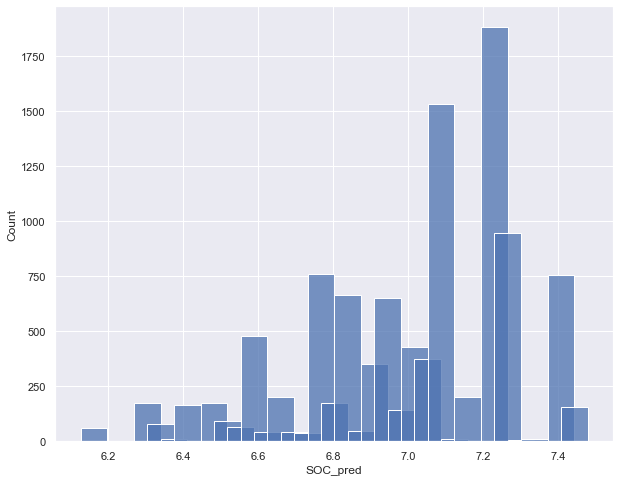

In [215]:
import seaborn as sns 
sns.histplot(x = "SOC_pred", data = other_estsoil, multiple ="stack", shrink =2) #element = step,poly
sns.set(rc={'figure.figsize':(12,8)})

In [168]:
other_estsoil["SOC_pred"].min()

6.14437009770882

In [169]:
other_estsoil["SOC_pred"].max()

7.4624404238572986

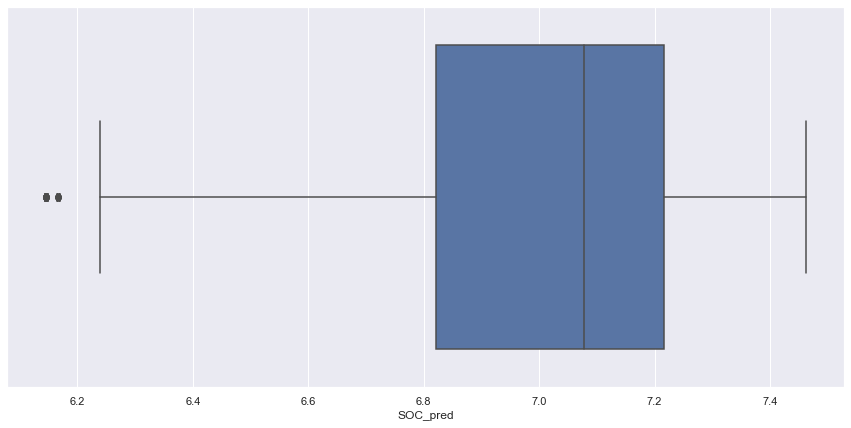

In [170]:
ax = sns.boxplot(x="SOC_pred", data=other_estsoil)
sns.set(rc={'figure.figsize':(13,8)})

<h1> Grassland <h1>

In [171]:
#Splitting data for machine learning

grassland = grassland.drop(["landuse","grassland_pct",
"forest_pct",
"arable_pct",
"area_grassland",
"area_forest",
"area_drain",
"other_pct",
"urban_pct",
"area_other",
"area_arable",
"area_wetland",
"wetland_pct",
"drain_pct",
"area_urban",
"water_pct",
"area_water"], axis =1)

y = np.array(grassland['SOC_mean'])

x = grassland.drop(['SOC_mean'], axis =1)


#Checking the shapes of data

print(f'x : {x.shape}')
print(f'y : {y.shape}')

x : (27, 16)
y : (27,)


In [172]:
grassland.columns

Index(['sand1', 'silt1', 'clay1', 'rock1', 'SOC_mean', 'slp_mean',
       'slp_median', 'slp_stdev', 'twi_mean', 'twi_median', 'twi_stdev',
       'ls_mean', 'ls_median', 'ls_stdev', 'tri_mean', 'tri_median',
       'tri_stdev'],
      dtype='object')

In [173]:
#splitting data into test and train set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 101)

In [174]:
print(f'x_train : {x_train.shape}')
print(f'y_tain : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (21, 16)
y_tain : (21,)
x_test : (6, 16)
y_test : (6,)


In [175]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor 
randomforest = RandomForestRegressor()

In [176]:
rfe_arable = RFE(estimator=randomforest, step=1)
rfe_arable = rfe_arable.fit(x_train,y_train)

In [177]:
arable_rfe_features = pd.DataFrame({"Feature":list(x_train.columns),
                                     "Ranking": rfe_arable.ranking_})
arable_rfe_features.sort_values(by="Ranking")

,Feature,Ranking
0,sand1,1
1,silt1,1
3,rock1,1
7,twi_mean,1
9,twi_stdev,1
11,ls_median,1
13,tri_mean,1
15,tri_stdev,1
8,twi_median,2
12,ls_stdev,3


In [178]:
ar_x_train_rfe = rfe_arable.transform(x_train)
ar_x_test_rfe = rfe_arable.transform(x_test)

In [179]:
ar_fin_rfe_model =  randomforest.fit(ar_x_train_rfe,y_train)

In [180]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {randomforest.score(ar_x_train_rfe,y_train):.3f}')
print (f'Test Accuracy - : {randomforest.score(ar_x_test_rfe,y_test):.3f}')

Train Accuracy - : 0.776
Test Accuracy - : -0.107


In [181]:
y_predict_train = ar_fin_rfe_model.predict((ar_x_train_rfe))

In [182]:
#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics

r_square_train = metrics.r2_score(y_train, y_predict_train)
print('R-Square Error associated with Random Forest Regression is: %.2f'%r_square_train)

R-Square Error associated with Random Forest Regression is: 0.78


In [183]:
#Mean absolute error evaluation
from sklearn.metrics import mean_absolute_error

print("The MAE is: %.2f" % mean_absolute_error(y_train, y_predict_train))    

The MAE is: 1.35


In [184]:
from sklearn.metrics import mean_squared_error
#Mean square error evaluation

print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_train, y_predict_train)))

rmsep = np.sqrt(np.mean(np.square(((y_train - y_predict_train) / y_train)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep)

Root Mean Squared Error associated with Random Forest Regression is: 1.70
Root Mean Squared Error in percentage: 0.26


In [185]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_train, y_predict_train))  

The EVS is: 0.78


In [186]:
y_predict_test = ar_fin_rfe_model.predict(ar_x_test_rfe)

In [187]:
#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics

r_square = metrics.r2_score(y_test, y_predict_test)
print('R-Square Error associated with Random Forest Regression is: %.2f'%r_square)

R-Square Error associated with Random Forest Regression is: -0.11


In [188]:
#Mean absolute error evaluation
from sklearn.metrics import mean_absolute_error

print("The MAE is: %.2f" % mean_absolute_error(y_test, y_predict_test))    

The MAE is: 3.50


In [189]:
from sklearn.metrics import mean_squared_error
#Mean square error evaluation

print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_test, y_predict_test)))

rmsep = np.sqrt(np.mean(np.square(((y_test - y_predict_test) / y_test)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep)

Root Mean Squared Error associated with Random Forest Regression is: 4.13
Root Mean Squared Error in percentage: 0.92


In [190]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_test, y_predict_test))    

The EVS is: -0.06


<h1> Grassland on final <h1>

In [191]:
grassland_estsoil = estsoil.loc[estsoil['landuse'] == "grassland"]

In [192]:
grassland_estsoil = grassland_estsoil[[
                                    
"sand1",
"silt1",
"rock1",
"twi_mean",
"twi_stdev",
"ls_median",
"ls_stdev",
"tri_stdev"
                                ]]

In [193]:
grassland_estsoil.shape

(56003, 8)

In [194]:
# running model on final data
values = grassland_estsoil.values

display(values.shape)
Prediction = ar_fin_rfe_model.predict(values)

grassland_estsoil['SOC_pred'] = Prediction

display(grassland_estsoil.sample(10))

(56003, 8)

,sand1,silt1,rock1,twi_mean,twi_stdev,ls_median,ls_stdev,tri_stdev,SOC_pred
55913,82,9,6,6.120208,5.562991,1.403600,2.302763,0.551278,9.397787
64264,55,30,0,6.327559,6.378280,0.477148,0.000000,0.287004,8.906321
504862,90,5,0,7.229842,7.078336,0.163067,0.000000,0.206425,8.634426
262137,55,30,25,10.227220,10.181565,0.108742,0.147847,0.037786,8.820173
257669,65,20,6,10.102626,10.048858,0.140661,0.090071,0.069674,8.781783
58667,90,5,0,4.878779,4.854558,1.284522,0.000000,0.890294,9.179068
814,82,9,0,7.912411,7.853334,0.247803,0.000000,0.198223,8.850767
641326,65,20,6,10.457763,10.244234,0.109182,0.099382,0.084811,7.860013
70930,82,9,6,6.292584,5.746219,0.883944,0.726754,0.309938,9.671400
116843,82,9,0,8.745037,8.809986,0.451674,0.281292,0.162178,8.470492


In [195]:
end_grassland_estsoil = end_estsoil.loc[end_estsoil['landuse'] == "grassland"]

In [196]:
end_grassland_estsoil['SOC_pred'] = Prediction

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [197]:
end_grassland_estsoil

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,est_crs1,sand1,silt1,clay1,rock1,k1,awc1,z2,est_txt2,lxtype2,est_crs2,sand2,silt2,clay2,rock2,k2,awc2,z3,est_txt3,lxtype3,est_crs3,sand3,silt3,clay3,rock3,k3,awc3,z4,est_txt4,lxtype4,est_crs4,sand4,silt4,clay4,rock4,k4,awc4,unit_area,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arabl,arable_pct,area_forest,forest_pct,area_grass,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry,landuse,SOC_pred
2,2,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.192500,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,2598.934724,0.279586,0.243441,0.199833,7.830969,7.614108,1.063368,3.521166,3.206231,2.545546,0.439148,0.408638,0.362313,0.0,0.000,0.000000,0.000000,24.841451,0.955832,1846.755097,71.058156,0.000000,0.000000,386.624055,14.876251,359.077009,13.816315,0.000000,0.000000,"POLYGON ((668550.130 6543573.200, 668543.495 6...",grassland,9.094042
3,3,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.195000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,4997.621962,0.531916,0.474287,0.328851,5.769673,5.732581,1.080556,7.297202,6.521130,4.471773,0.856971,0.253316,1.096561,0.0,0.000,0.000000,0.000000,1671.641546,33.448739,3325.980417,66.551261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((679817.320 6545854.050, 679829.522 6...",grassland,9.383453
4,4,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.188333,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1652.049209,0.296661,0.275507,0.193926,8.204620,8.160692,0.961941,3.493085,2.991859,2.659980,0.519368,0.157721,0.978945,0.0,0.000,0.000000,0.000000,0.000000,0.000000,1623.649785,98.280958,0.000000,0.000000,0.000000,0.000000,28.399424,1.719042,0.000000,0.000000,"POLYGON ((677362.640 6546501.230, 677345.370 6...",grassland,8.625127
6,6,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.188333,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,4322.771007,0.345461,0.250814,0.232148,7.752071,7.876843,1.269250,4.264050,3.196932,3.115484,0.446607,0.236289,0.593647,0.0,0.000,0.000000,0.000000,1099.790433,25.441793,2694.167704,62.325016,0.000000,0.000000,0.000000,0.000000,528.812870,12.233192,0.000000,0.000000,"POLYGON ((674091.160 6554175.240, 674091.920 6...",grassland,8.613954
7,7,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.192778,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,9238.068027,0.308602,0.225711,0.272148,8.017994,8.208470,1.376021,3.904276,2.666234,3.656857,0.476979,0.166001,0.786160,0.0,0.000,0.000000,0.000000,2282.309511,24.705485,6698.922421,72.514322,0.000000,0.000000,0.000000,0.000000,256.836096,2.780193,0.000000,0.000000,"POLYGON ((674016.090 6554262.990, 674006.040 6...",grassland,8.720594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745382,745409,TxM,HS-sa-qt,HS,t₃60/tls,2.0,1000.0,600.0,t3,PEAT,None,15,15,70,0,9.20,0.193500,1000.0,tls,SiL,None,35.0,50.0,15.0,0.0,5.09,0.1825,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,9444.417505,0.093898,0.085186,0.046418,10.006336,9.969614,0.811395,1.047435,0.908027,0.678646,0.108568,0.000000,0.139518,0.0,0.000,

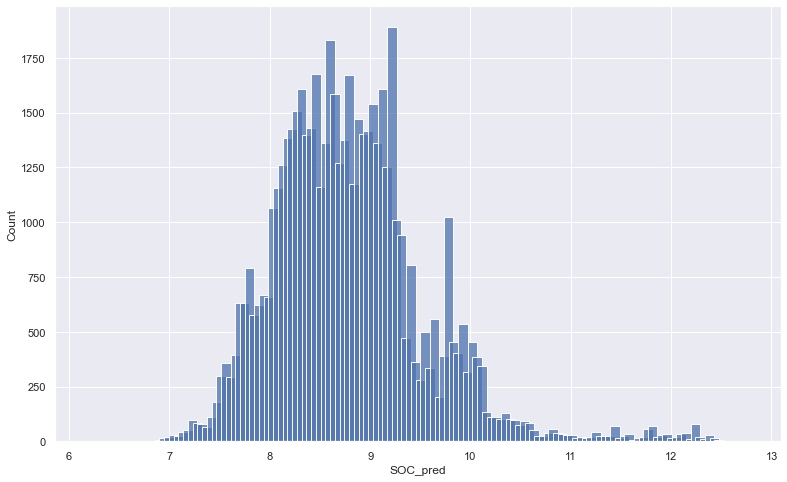

In [198]:
import seaborn as sns 
sns.histplot(x = "SOC_pred", data = grassland_estsoil, multiple ="stack", shrink =2) #element = step,poly
sns.set(rc={'figure.figsize':(15,7)})

In [199]:
grassland_estsoil["SOC_pred"].min()


6.214508586047566

In [200]:
grassland_estsoil["SOC_pred"].max()

12.738722872551044

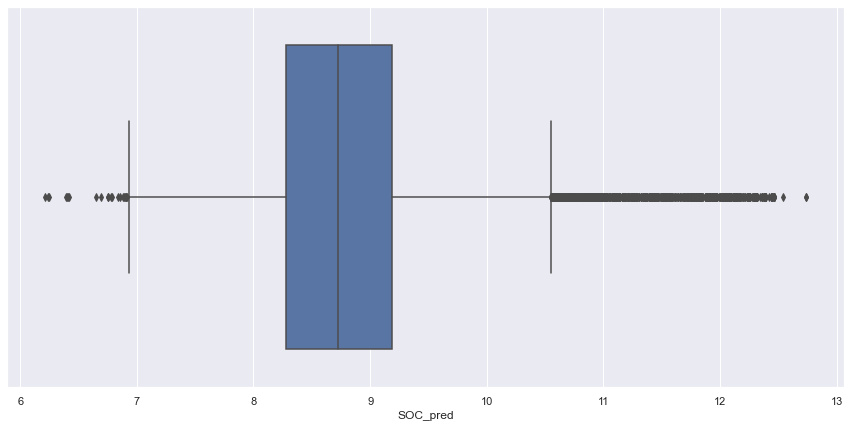

In [201]:
ax = sns.boxplot(x="SOC_pred", data=grassland_estsoil)
sns.set(rc={'figure.figsize':(13,8)})

<h1> Concatinating all landuses <h1>

In [202]:
frames = [end_grassland_estsoil ,  end_wetland_estsoil,   end_forest_estsoil , end_arable_estsoil ]



In [203]:
result = pd.concat(frames)

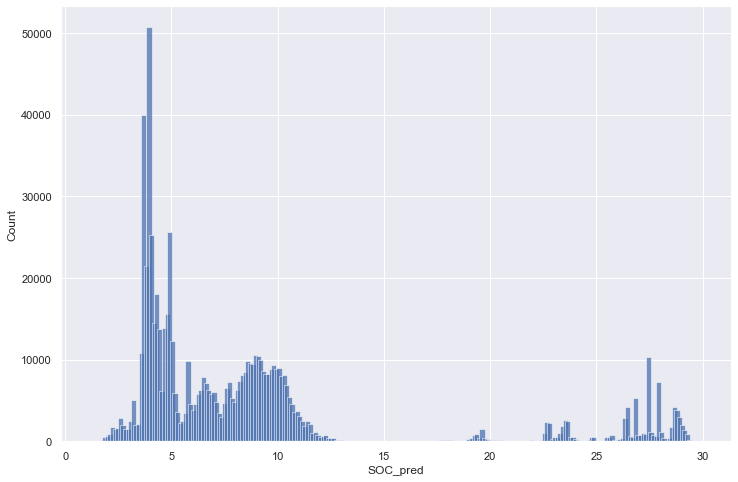

In [210]:
import seaborn as sns 
sns.histplot(x = "SOC_pred", data = result, multiple ="stack", shrink =2) #element = step,poly
sns.set(rc={'figure.figsize':(15,7)})

In [205]:
result["SOC_pred"].min()

1.3123432781941207

In [206]:
result["SOC_pred"].max()

29.832344366770123

In [209]:
result.columns

Index(['orig_fid', 'est_soilty', 'wrb_code', 'wrb_main', 'est_txcode',
       'nlayers', 'zmx', 'z1', 'est_txt1', 'lxtype1', 'est_crs1', 'sand1',
       'silt1', 'clay1', 'rock1', 'k1', 'awc1', 'z2', 'est_txt2', 'lxtype2',
       'est_crs2', 'sand2', 'silt2', 'clay2', 'rock2', 'k2', 'awc2', 'z3',
       'est_txt3', 'lxtype3', 'est_crs3', 'sand3', 'silt3', 'clay3', 'rock3',
       'k3', 'awc3', 'z4', 'est_txt4', 'lxtype4', 'est_crs4', 'sand4', 'silt4',
       'clay4', 'rock4', 'k4', 'awc4', 'unit_area', 'tri_mean', 'tri_stdev',
       'tri_median', 'twi_mean', 'twi_stdev', 'twi_median', 'slp_mean',
       'slp_stdev', 'slp_median', 'ls_mean', 'ls_stdev', 'ls_median',
       'area_drain', 'drain_pct', 'area_arabl', 'arable_pct', 'area_forest',
       'forest_pct', 'area_grass', 'grassland_pct', 'area_wetland',
       'wetland_pct', 'area_urban', 'urban_pct', 'area_water', 'water_pct',
       'area_other', 'other_pct', 'geometry', 'landuse', 'SOC_pred'],
      dtype='object')

In [216]:
result.to_file('data/separate_landuses.shp', encoding='utf-8')

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\y.Israfilbayov\AppData\Local\Temp\ipykernel_18876\2996145998.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result.to_file('data/separate_landuses.shp', encoding='utf-8')
